In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df=pd.read_csv(r"C:\Users\user\Downloads\avocado\avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.shape

(18249, 14)

## Part1- Considering region as a Label and others as feature

## Exploratory Data Analysis

## checking nulls

In [5]:
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Observation: No nulls found, lets proceed.

## Checking Data type

In [7]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

## Analysing Features with respect to region

Text(0.5, 1.0, 'Average Price distribution in Each Region based on year')

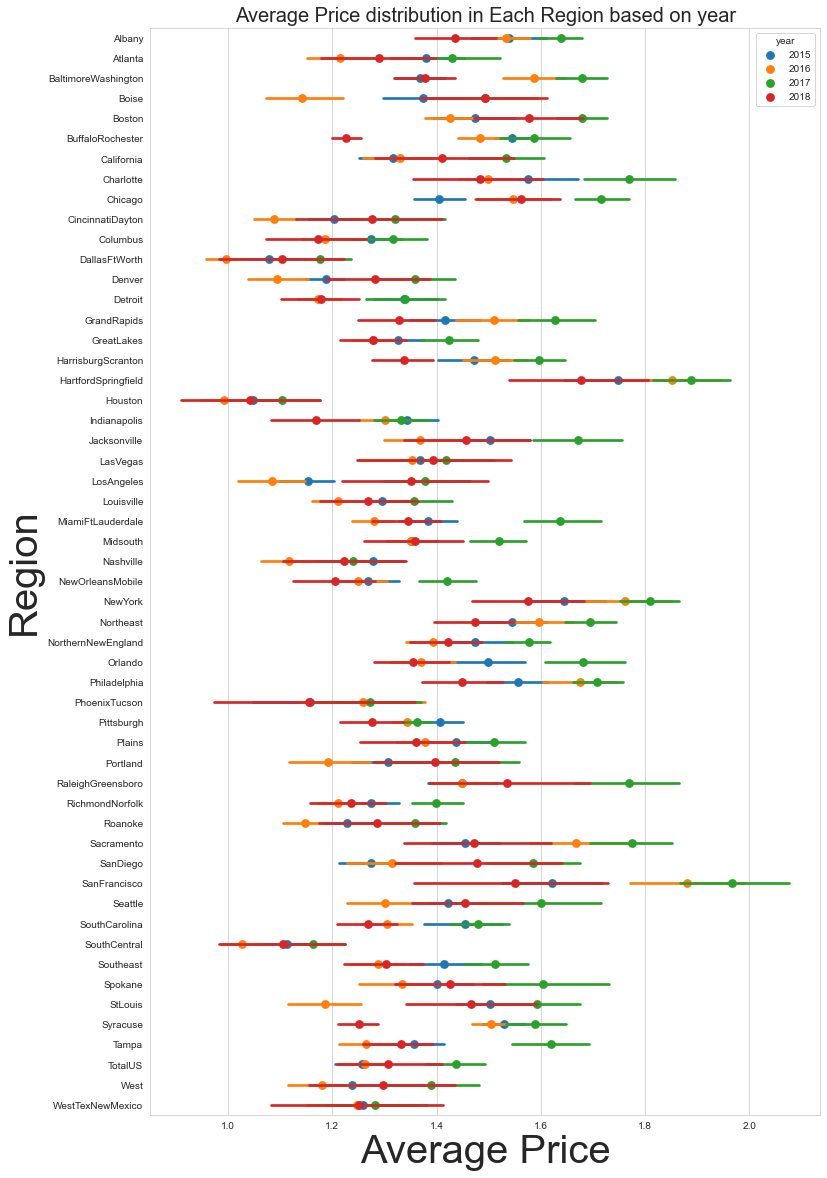

In [17]:
#Analysing average price and year
plt.figure(figsize=(12,20))
sns.pointplot(x='AveragePrice',y='region',data=df, hue='year',join=False)
plt.xlabel('Average Price',fontsize=40)
plt.ylabel('Region',fontsize=40)
plt.title("Average Price distribution in Each Region based on year",{'fontsize':20})

Observation: Average price is maximum in HartfordSpringFeild among all the years and avg price is minimum in Houston

Text(0.5, 1.0, 'Average Price distribution in Each Region based on year')

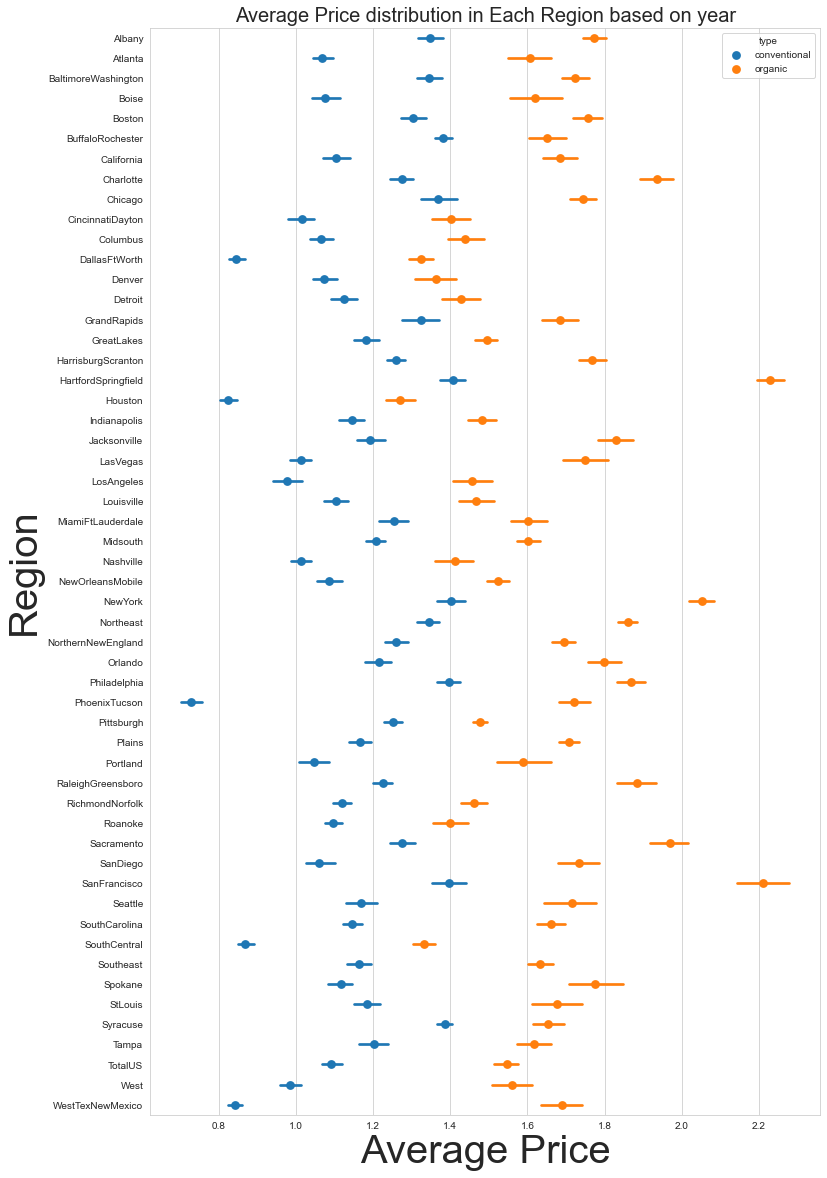

In [32]:
#Analysing average price and type
plt.figure(figsize=(12,20))
sns.pointplot(x='AveragePrice',y='region',data=df, hue='type',join=False)
plt.xlabel('Average Price',fontsize=40)
plt.ylabel('Region',fontsize=40)
plt.title("Average Price distribution in Each Region based on year",{'fontsize':20})

Observation: We could observe that rates of Organic is always higher then conventional. HartfordSpringFeild has costliest organic avocados, Houstan sells cheapest organic avocados. HartfordSpringFeild, NewYork and Philadelphia sells costliest conventional avocados and Phoenix Tuscon sells cheapest conventional avocados.

In [35]:
pd.set_option('display.max_rows', None)
df.groupby('region')['type'].value_counts()

region               type        
Albany               conventional    169
                     organic         169
Atlanta              conventional    169
                     organic         169
BaltimoreWashington  conventional    169
                     organic         169
Boise                conventional    169
                     organic         169
Boston               conventional    169
                     organic         169
BuffaloRochester     conventional    169
                     organic         169
California           conventional    169
                     organic         169
Charlotte            conventional    169
                     organic         169
Chicago              conventional    169
                     organic         169
CincinnatiDayton     conventional    169
                     organic         169
Columbus             conventional    169
                     organic         169
DallasFtWorth        conventional    169
                     or

We could observe WestTexNewMexico sells more of conventional then organic.

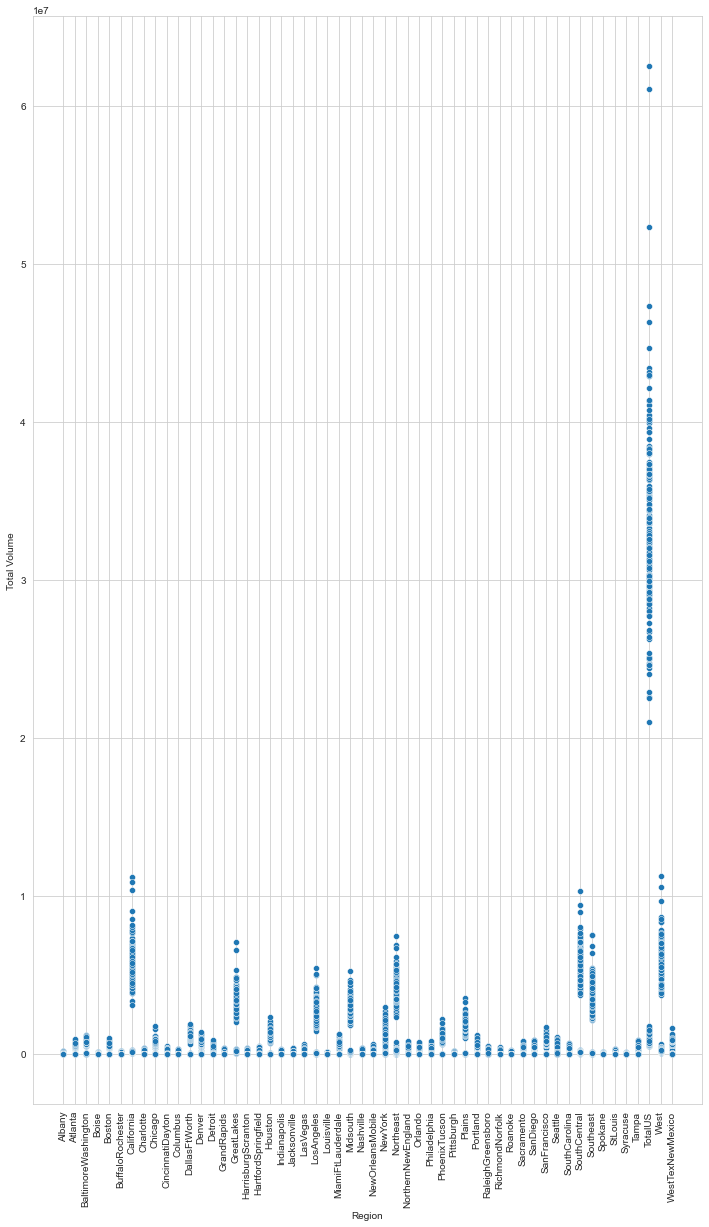

In [40]:
#Relation between region and total volume
plt.figure(figsize=(12,20))
a=sns.scatterplot(x=df['region'],y=df['Total Volume'],data=df)
plt.xlabel('Region')
plt.ylabel('Total Volume')
plt.xticks(rotation=90)
plt.show()

Observation: Heighest total volume of avocado is selling in California and West.

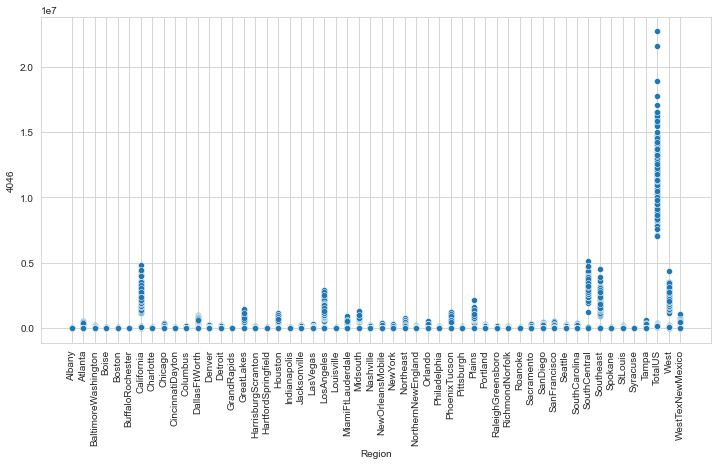

In [43]:
#Relation between region and 4046
plt.figure(figsize=(12,6))
a=sns.scatterplot(x=df['region'],y=df['4046'],data=df)
plt.xlabel('Region')
plt.ylabel('4046')
plt.xticks(rotation=90)
plt.show()

Observation:Highest 4046 sale is in SouthCentral.

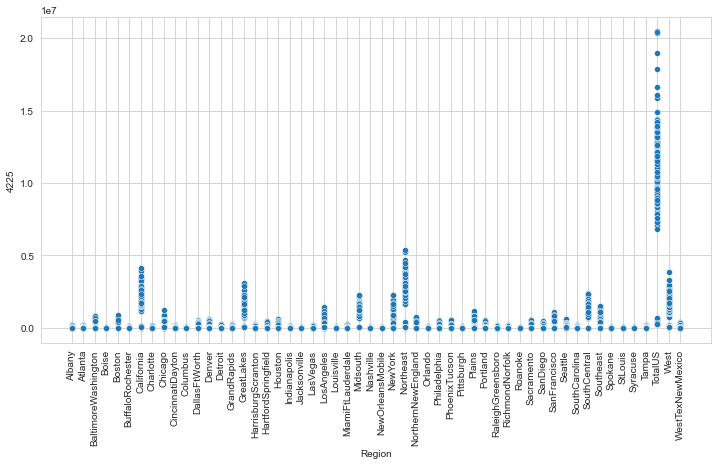

In [44]:
#Relation between region and 4225
plt.figure(figsize=(12,6))
a=sns.scatterplot(x=df['region'],y=df['4225'],data=df)
plt.xlabel('Region')
plt.ylabel('4225')
plt.xticks(rotation=90)
plt.show()

Observation:Highest 4225 sale is in Northeast.

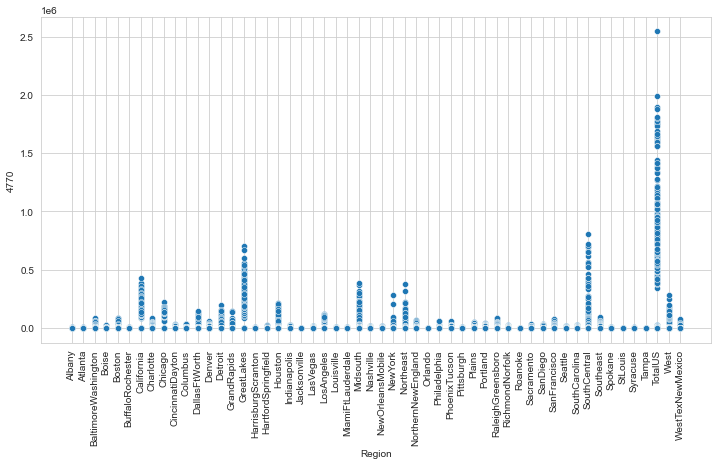

In [45]:
#Relation between region and 4770
plt.figure(figsize=(12,6))
a=sns.scatterplot(x=df['region'],y=df['4770'],data=df)
plt.xlabel('Region')
plt.ylabel('4770')
plt.xticks(rotation=90)
plt.show()

Observation:Highest 4770 sale is in SouthCentral.

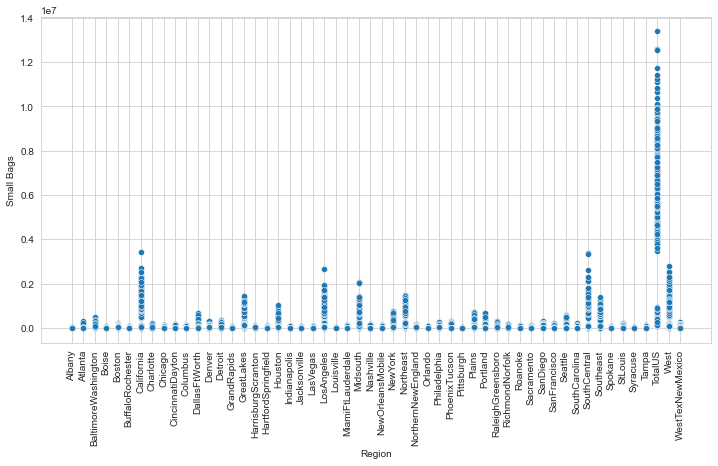

In [47]:
#Relation between region and Small Bags
plt.figure(figsize=(12,6))
a=sns.scatterplot(x=df['region'],y=df['Small Bags'],data=df)
plt.xlabel('Region')
plt.ylabel('Small Bags')
plt.xticks(rotation=90)
plt.show()

Observation:Highest small bags sale is in SouthCentral,California and west.

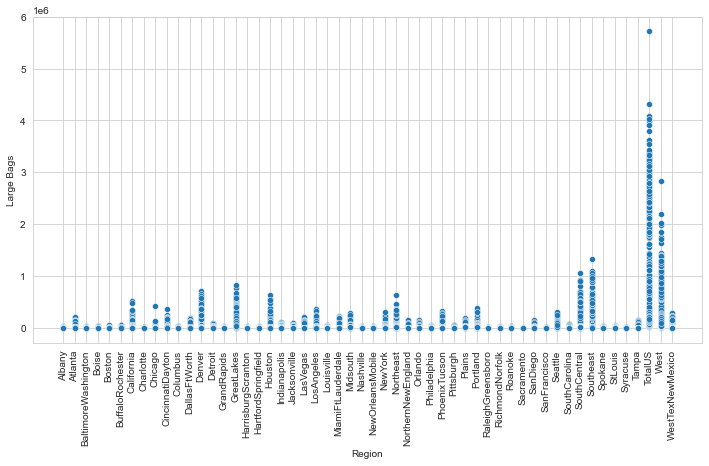

In [48]:
#Relation between region and Large Bags
plt.figure(figsize=(12,6))
a=sns.scatterplot(x=df['region'],y=df['Large Bags'],data=df)
plt.xlabel('Region')
plt.ylabel('Large Bags')
plt.xticks(rotation=90)
plt.show()

Observation:Highest large bags sale is in west.

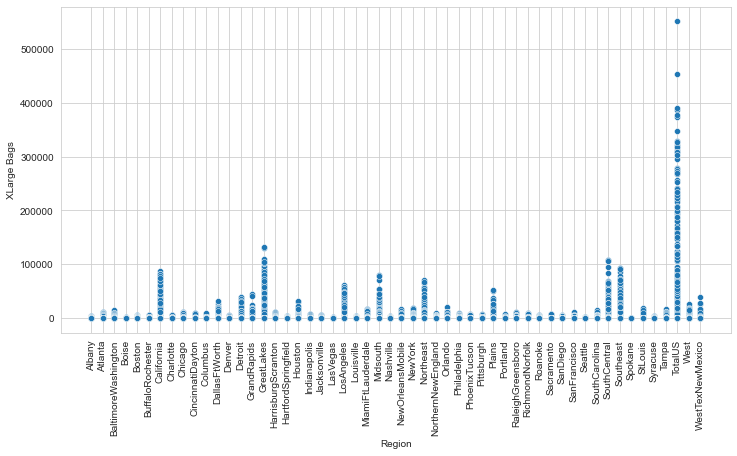

In [49]:
#Relation between region and XLarge Bags
plt.figure(figsize=(12,6))
a=sns.scatterplot(x=df['region'],y=df['XLarge Bags'],data=df)
plt.xlabel('Region')
plt.ylabel('XLarge Bags')
plt.xticks(rotation=90)
plt.show()

Observation:Highest Xlarge bags sale is in GreatLakes.

In [3]:
df=df.drop(['Unnamed: 0'],axis=1)

## Encoding

In [4]:
#Using ordinal encoder
oe=OrdinalEncoder()
df1=oe.fit_transform(df[['Date']])
df['Date']=df1
df2=oe.fit_transform(df[['type']])
df['type']=df2
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,Albany
1,50.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,Albany
2,49.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,Albany
3,48.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,Albany
4,47.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,Albany


In [5]:
# Label encoding for Region
le=LabelEncoder()
df1=le.fit_transform(df['region'])
df['region']=df1
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0
1,50.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0
2,49.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0
3,48.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0
4,47.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0


## Describing the data

In [55]:
df.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,83.997096,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644
std,48.787638,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000
25%,42.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000
50%,84.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000
75%,126.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000
max,168.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000


Observation: We could observe skewness in AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags	

## Checking relation between features and label

In [56]:
df.corr().abs()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,1.000000,0.145514,0.009263,0.005028,0.016895,0.047517,0.064688,0.056902,0.081855,0.077374,0.000060,0.950274,0.000101
AveragePrice,0.145514,1.000000,0.192752,0.208317,0.172928,0.179446,0.177088,0.174730,0.172940,0.117592,0.615845,0.093197,0.011716
Total Volume,0.009263,0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.232434,0.017193,0.174176
4046,0.005028,0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.225819,0.003353,0.192073
4225,0.016895,0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,0.232289,0.009559,0.145726
4770,0.047517,0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,0.210027,0.036531,0.095252
Total Bags,0.064688,0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.217788,0.071552,0.175256
Small Bags,0.056902,0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.220535,0.063915,0.164702
Large Bags,0.081855,0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.193177,0.087891,0.198768
XLarge Bags,0.077374,0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.175483,0.081033,0.082281


<AxesSubplot:>

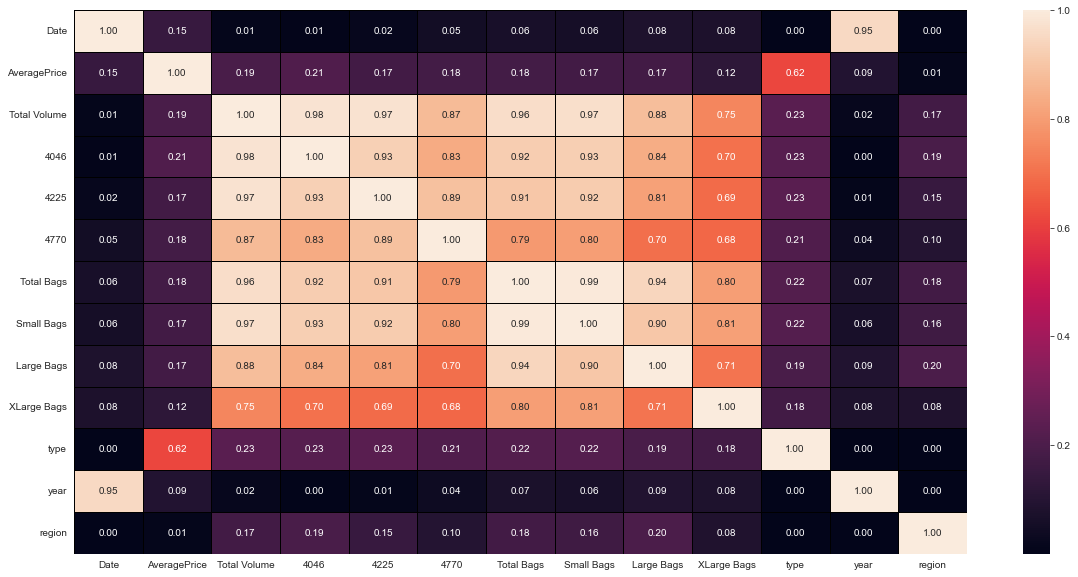

In [57]:
# Plotting heat map for better analysis
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')

Observation: Multicollinearity exists between many features, so we would use VIF to treat it.

## VIF

In [58]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['features']=df.columns
vif

,vif,features
0,4.317681e+00,Date
1,2.270532e+01,AveragePrice
2,5.226352e+09,Total Volume
3,6.965555e+08,4046
4,6.349903e+08,4225
5,4.986686e+06,4770
6,2.502000e+14,Total Bags
7,1.429714e+14,Small Bags
8,1.521486e+13,Large Bags
9,7.856326e+10,XLarge Bags


## Checking Outliers

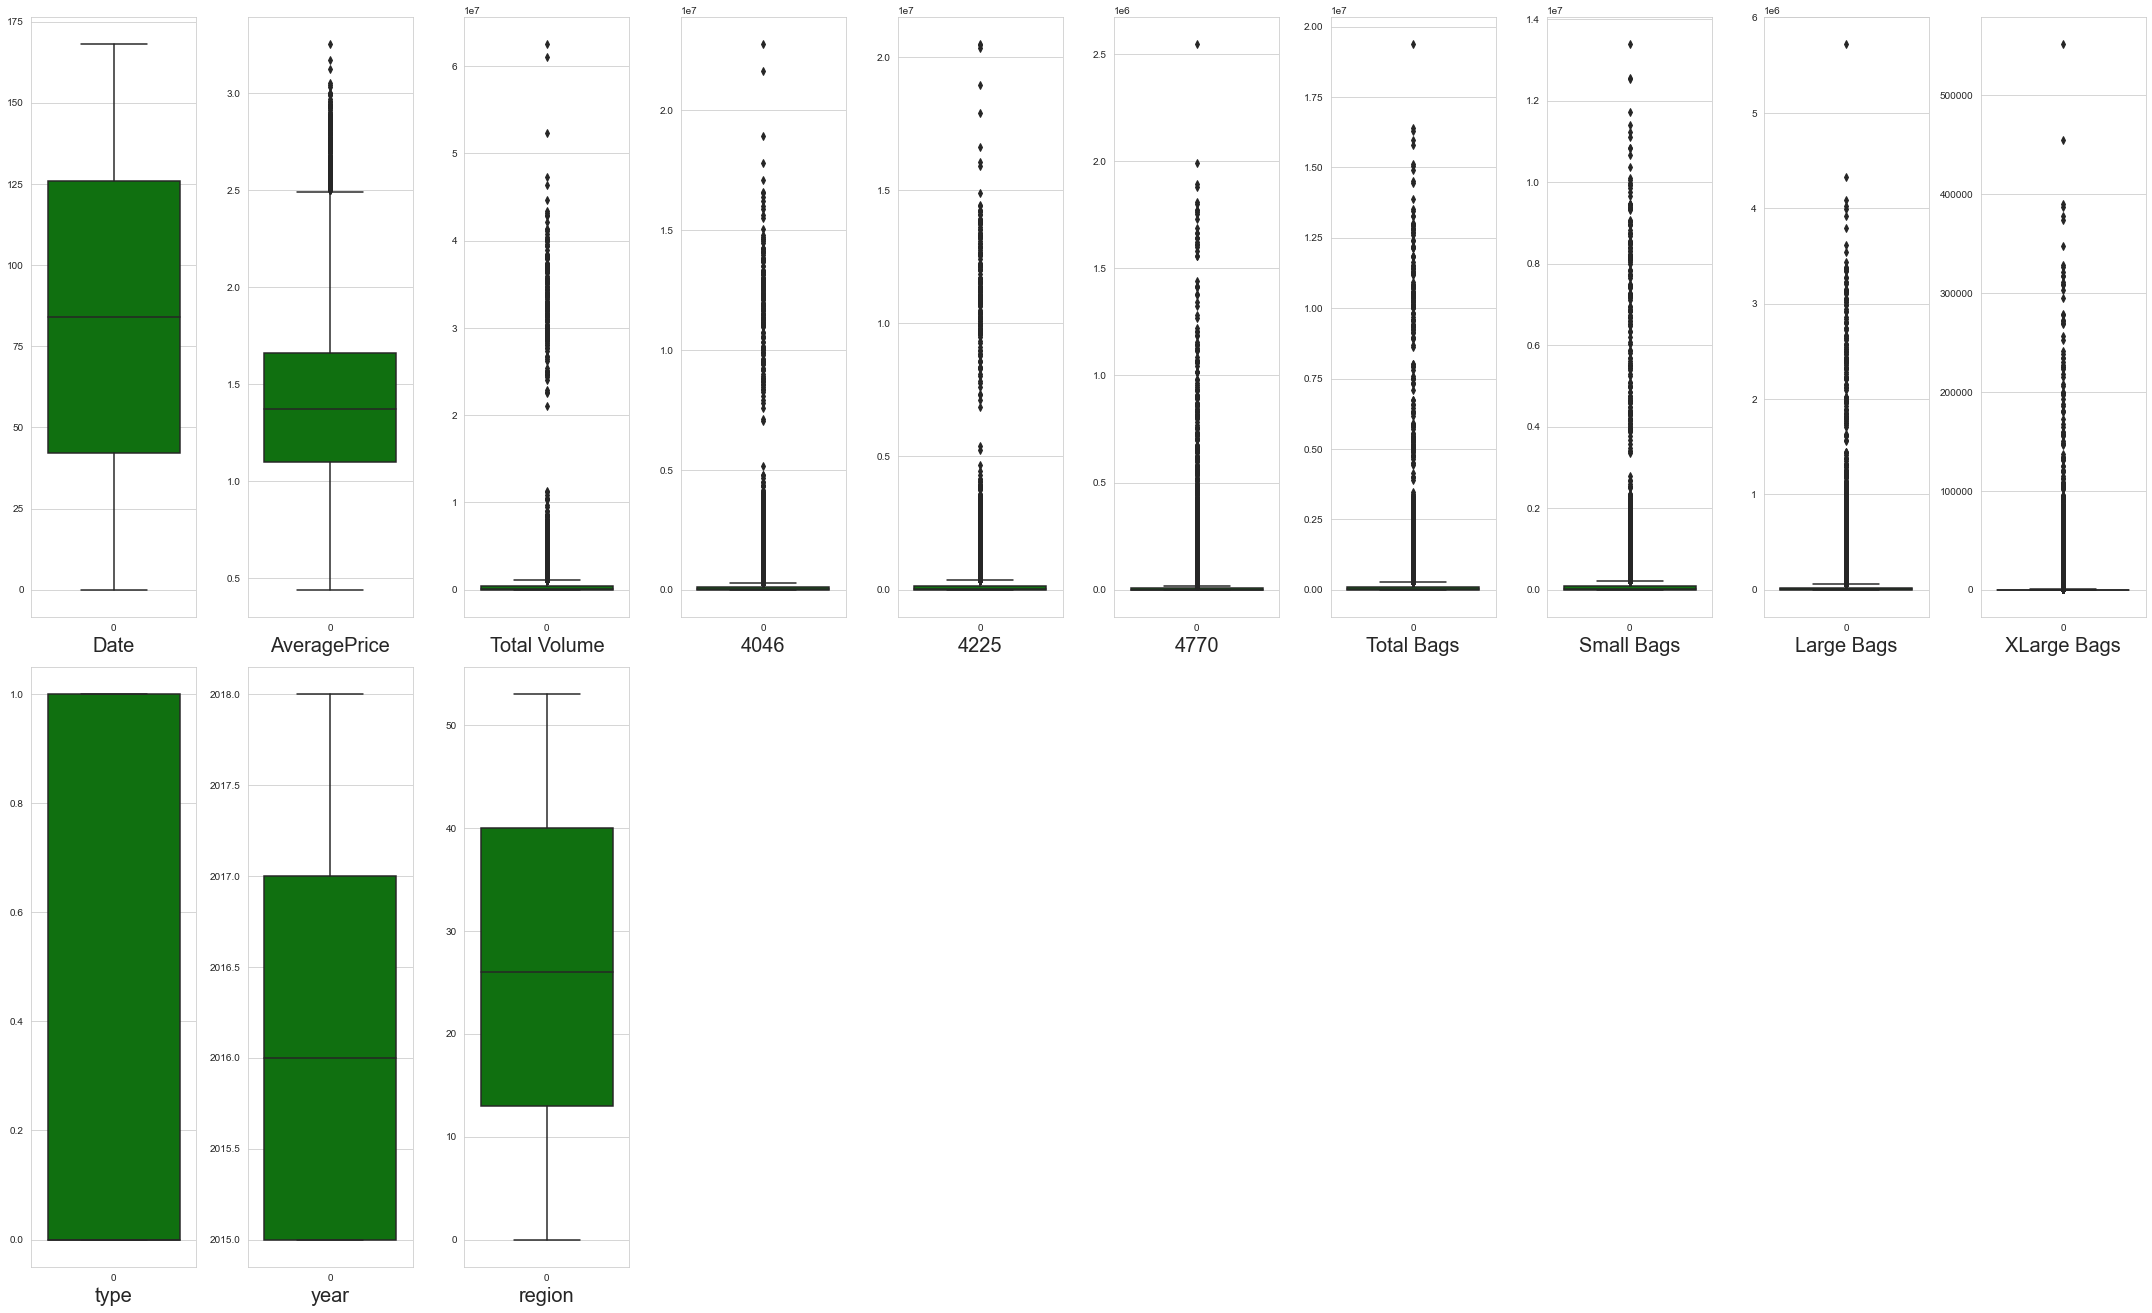

In [58]:
col=df.columns
plt.figure(figsize=(30,90))
for i in range(len(col)):
    plt.subplot(10,10,i+1)
    sns.boxplot(data=df[col[i]],color='green',orient='v')
    plt.xlabel(col[i],fontsize=20)
    plt.tight_layout()

Observation: We could see lot many outliers in AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags

## Checking Skewness

In [60]:
df.skew()

Date             0.000117
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

Observation:We could see skewness in AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags considering the range of skewness as (-0.5 to 0.5)

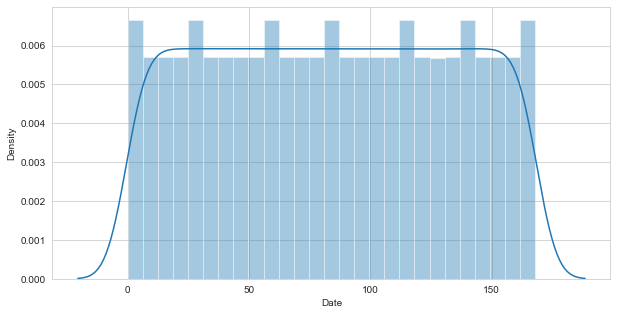

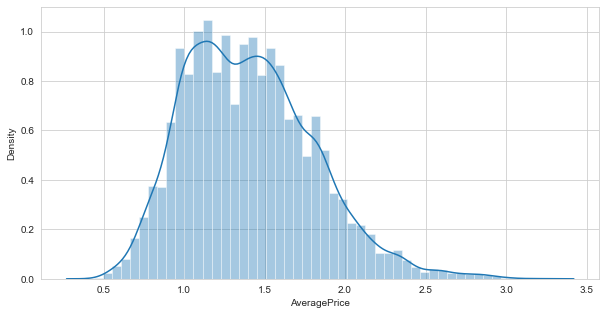

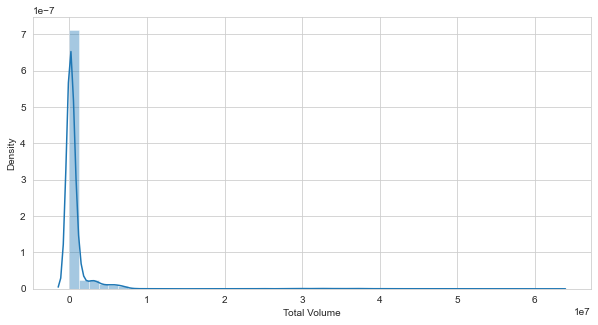

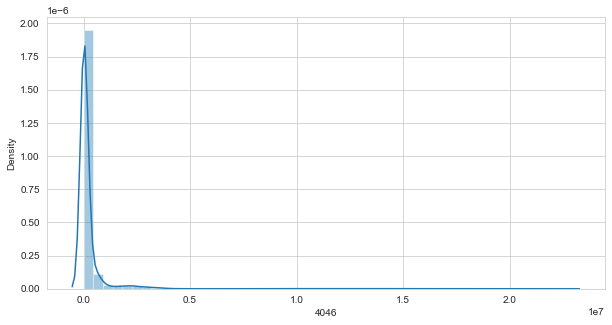

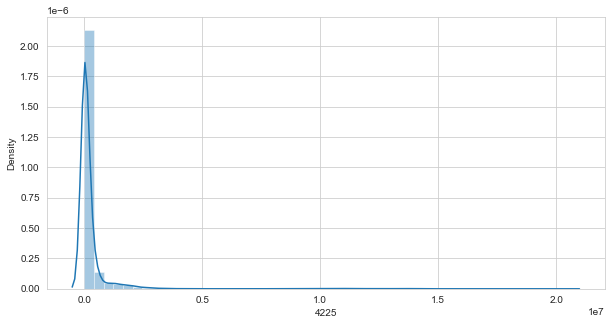

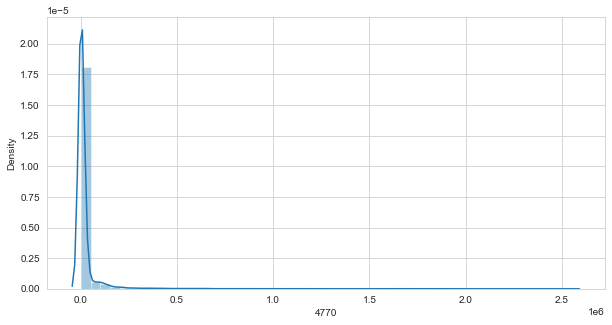

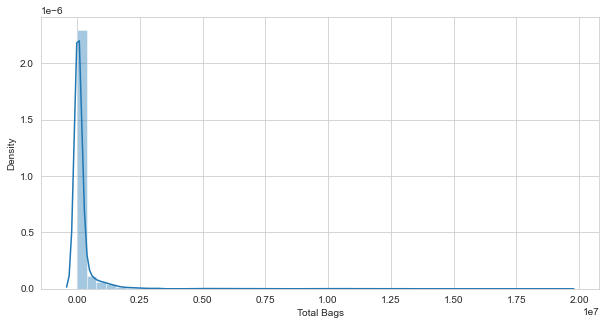

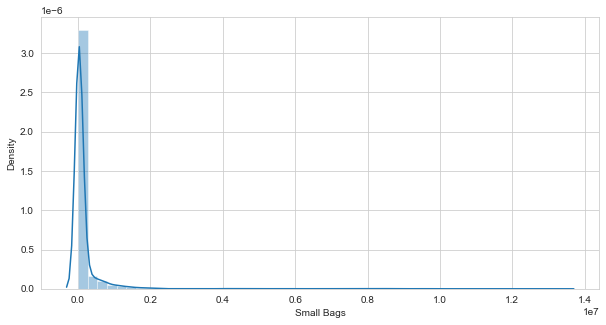

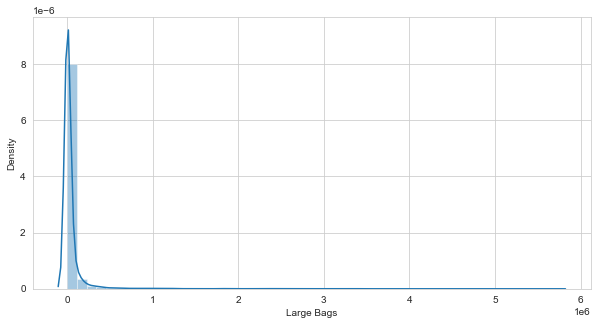

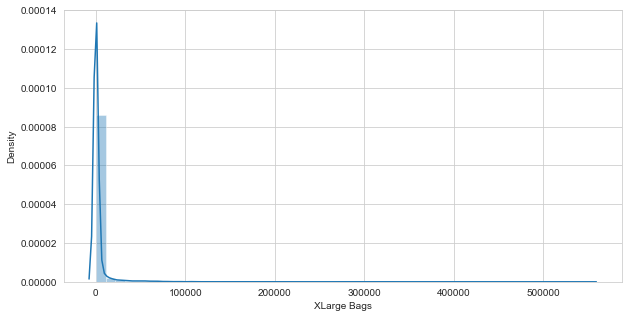

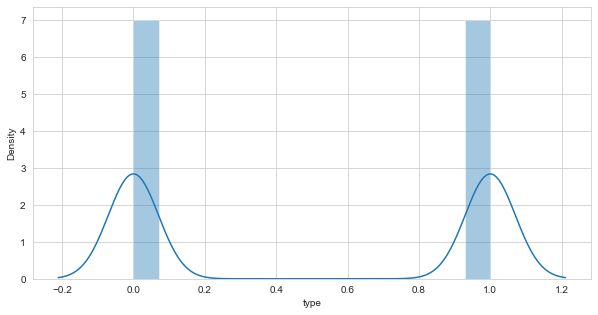

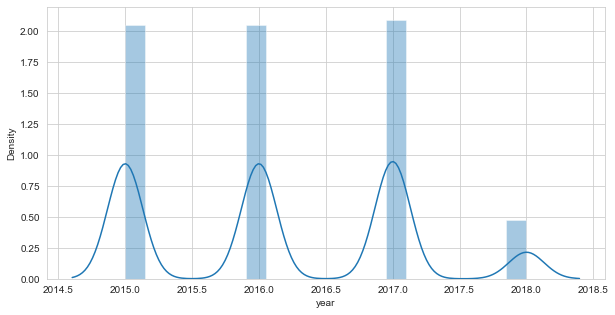

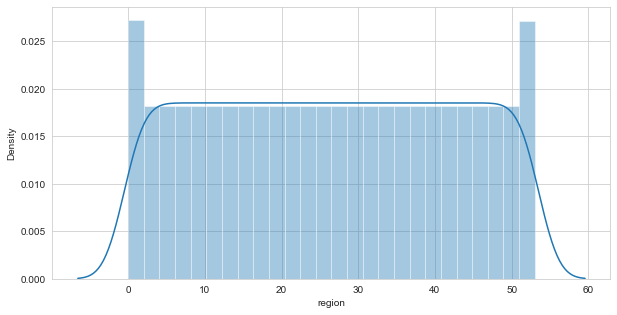

In [61]:
# Ploting Distribution plot to cross check skewness
import warnings
warnings.filterwarnings('ignore')
col=df.columns
# for feature Length
for i in range(len(df.columns)):
    plt.figure(figsize=(10,5))
    sns.distplot(df[col[i]])
    plt.xlabel(col[i],fontsize=10)

Our obervation is correct there is skewness present.

## Removing Multicollinearity

Since Total Bags is having highest VIF and it also has lot of outliers and skewness so we will drop it.

In [6]:
df=df.drop(['Total Bags'],axis=1)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51.0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,0.0,2015,0
1,50.0,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,0.0,2015,0
2,49.0,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,0.0,2015,0
3,48.0,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,0.0,2015,0
4,47.0,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,0.0,2015,0


In [7]:
#Lets check VIF again
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['features']=df.columns
vif

,vif,features
0,4.317303e+00,Date
1,2.270530e+01,AveragePrice
2,5.226349e+09,Total Volume
3,6.965549e+08,4046
4,6.349897e+08,4225
5,4.986682e+06,4770
6,2.437455e+08,Small Bags
7,2.580870e+07,Large Bags
8,1.332648e+05,XLarge Bags
9,3.388019e+00,type


Observation: Now the highest vif is of Total Volume and it also has lot of outliers and skewness so we will drop it.

In [8]:
df=df.drop(['Total Volume'],axis=1)
df.head()

,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51.0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0.0,2015,0
1,50.0,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0.0,2015,0
2,49.0,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0.0,2015,0
3,48.0,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0.0,2015,0
4,47.0,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0.0,2015,0


In [62]:
#Lets check VIF again
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['features']=df.columns
vif

,vif,features
0,4.305792,Date
1,22.700568,AveragePrice
2,10.790675,4046
3,14.359143,4225
4,5.644944,4770
5,20.638218,Small Bags
6,5.904739,Large Bags
7,3.527573,XLarge Bags
8,3.382137,type
9,20.035922,year


Observation: Now the highest vif is of AveragePrice, but it is an important feature in analysis so lets drop next highest vif that is year,

In [9]:
df=df.drop(['year'],axis=1)
df.head()

,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region
0,51.0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0.0,0
1,50.0,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0.0,0
2,49.0,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0.0,0
3,48.0,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0.0,0
4,47.0,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0.0,0


In [64]:
#Lets check VIF again
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['features']=df.columns
vif

,vif,features
0,4.037197,Date
1,9.318673,AveragePrice
2,10.741408,4046
3,14.328394,4225
4,5.596970,4770
5,20.635070,Small Bags
6,5.902843,Large Bags
7,3.523306,XLarge Bags
8,3.102612,type
9,3.607564,region


Observation: Next highest vif is Small Bags but its strongly related to region so cannot drop it.

Lets continue with these features.

## Treating Outliers

In [10]:
#Getting sure of outliers using z score

z=np.abs(zscore(df))
i=np.where(z>3)
print("Outliers index-\n",set(i[0]))
print("\n\nNumber of rows to be eliminated-\n",len(set(i[0])))

Outliers index-
 {16395, 16399, 4131, 4132, 4133, 16421, 14385, 8319, 8320, 8321, 8322, 8323, 8324, 8325, 8326, 8327, 8328, 8329, 8330, 8331, 8332, 8333, 8334, 8335, 8336, 8337, 8338, 8339, 8340, 8341, 8342, 8343, 8344, 8345, 8346, 8347, 8348, 8349, 8350, 8351, 8352, 8353, 8354, 8355, 8356, 8357, 8358, 8359, 8360, 8361, 8362, 8363, 8364, 8365, 8366, 8367, 8368, 8369, 8370, 8371, 8372, 8373, 8374, 8375, 8376, 8378, 8379, 8380, 8381, 8391, 8392, 8393, 8394, 8395, 8396, 8397, 8398, 8399, 8400, 8401, 8402, 8403, 8404, 8405, 8406, 8407, 8408, 8409, 8410, 8411, 8413, 8414, 8415, 8416, 8417, 8418, 8419, 8420, 8421, 8422, 8423, 8424, 4339, 4340, 4341, 4349, 4362, 6411, 16660, 16661, 16662, 16663, 16664, 16665, 16666, 16667, 6430, 6431, 6432, 6434, 6435, 2340, 6437, 2341, 6439, 6436, 2348, 6445, 2351, 6448, 6455, 2368, 2370, 16714, 16715, 16717, 16718, 16719, 16720, 16721, 346, 16734, 16737, 16738, 8550, 359, 8551, 8552, 8553, 8554, 8555, 8556, 8557, 8558, 8559, 8560, 8561, 14699, 14701, 14702,

In [71]:
df.shape

(18249, 5)

In [66]:
#Calculating Data Loss
loss=((18249-598)/18249)*100
print("The data loss-",100-loss,"%")

The data loss- 3.2768918844868153 %


We could bear with 3% data loss so lets drop these rows.

In [67]:
#removing rows with outliers
df=df.drop(df.index[i[0]])
df.shape

(17651, 10)

## Splitting into features and labels

In [11]:
x=df.drop(['region'],axis=1)
x.head()

,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type
0,51.0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0.0
1,50.0,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0.0
2,49.0,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0.0
3,48.0,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0.0
4,47.0,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0.0


In [12]:
y=df['region']
y.shape

(18249,)

## Treating Skewness

In [13]:
#using yeo-johnson transformation
x=power_transform(x,method='yeo-johnson')
x

array([[-0.58305373, -0.08624822, -0.65861896, ..., -0.77335071,
        -0.69984934, -0.99983562],
       [-0.60532524, -0.03402196, -0.77686953, ..., -0.76343481,
        -0.69984934, -0.99983562],
       [-0.62772182, -1.27393796, -0.73194656, ..., -0.75081989,
        -0.69984934, -0.99983562],
       ...,
       [ 1.40879579,  1.14779044, -0.61983119, ..., -0.94348631,
        -0.69984934,  1.00016441],
       [ 1.39266926,  1.2658763 , -0.55028196, ..., -0.90851023,
        -0.69984934,  1.00016441],
       [ 1.37651374,  0.61828746, -0.36790819, ..., -1.0422502 ,
        -0.69984934,  1.00016441]])

## Standardization of data

In [14]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-0.58305373, -0.08624822, -0.65861896, ..., -0.77335071,
        -0.69984934, -0.99983562],
       [-0.60532524, -0.03402196, -0.77686953, ..., -0.76343481,
        -0.69984934, -0.99983562],
       [-0.62772182, -1.27393796, -0.73194656, ..., -0.75081989,
        -0.69984934, -0.99983562],
       ...,
       [ 1.40879579,  1.14779044, -0.61983119, ..., -0.94348631,
        -0.69984934,  1.00016441],
       [ 1.39266926,  1.2658763 , -0.55028196, ..., -0.90851023,
        -0.69984934,  1.00016441],
       [ 1.37651374,  0.61828746, -0.36790819, ..., -1.0422502 ,
        -0.69984934,  1.00016441]])

## Train test split

In [15]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
max_ac=0
randomState=0
lr=LogisticRegression()
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("\n\nAt random state:",i)
        print("\nTrain Accuracy- ",round(accuracy_score(y_train,pred_train)*100,1))
        print("\nTest Accuracy- ",round(accuracy_score(y_test,pred_test)*100,1))
        if round(accuracy_score(y_test,pred_test)*100,1)>max_ac:
            randomState=i
            max_ac=round(accuracy_score(y_test,pred_test)*100,1)
print("\n\n Best accuracy at random state-",randomState)



 Best accuracy at random state- 0


## Applying Logistic Regression

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=66,test_size=0.20)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
train_accuracy=round(accuracy_score(y_train,pred_train)*100,1)
test_accuracy=round(accuracy_score(y_test,pred_test)*100,1)
print("\ntrain accuracy-",train_accuracy)
print("\ntest accuracy-",test_accuracy)


train accuracy- 51.3

test accuracy- 51.2


## Cross Validation Score

In [17]:
for i in range(4,20):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",test_accuracy)



At cv- 4

 cross validation score is- 31.64568369775263

 Accuracy score is- 51.2


At cv- 5

 cross validation score is- 37.55228717194052

 Accuracy score is- 51.2


At cv- 6

 cross validation score is- 36.7585650792086

 Accuracy score is- 51.2


At cv- 7

 cross validation score is- 40.851553509781354

 Accuracy score is- 51.2


At cv- 8

 cross validation score is- 41.25703953821935

 Accuracy score is- 51.2


At cv- 9

 cross validation score is- 42.51210455908569

 Accuracy score is- 51.2


At cv- 10

 cross validation score is- 42.70945385724585

 Accuracy score is- 51.2


At cv- 11

 cross validation score is- 43.788700750726065

 Accuracy score is- 51.2


At cv- 12

 cross validation score is- 43.821614358051605

 Accuracy score is- 51.2


At cv- 13

 cross validation score is- 44.155791360956115

 Accuracy score is- 51.2


At cv- 14

 cross validation score is- 44.381338184719

 Accuracy score is- 51.2


At cv- 15

 cross validation score is- 44.79737436751286

 Accuracy 

So we are getting the least difference between cross_val_score and accuracy score at cv=19

In [19]:
cv_score_best=cross_val_score(lr,x,y,cv=19).mean()*100
print("cross validation score is-",cv_score_best)
print("accuracy score for linear regression model is-",test_accuracy)

cross validation score is- 45.8773869507275
accuracy score for linear regression model is- 51.2


## Confusion Matrix

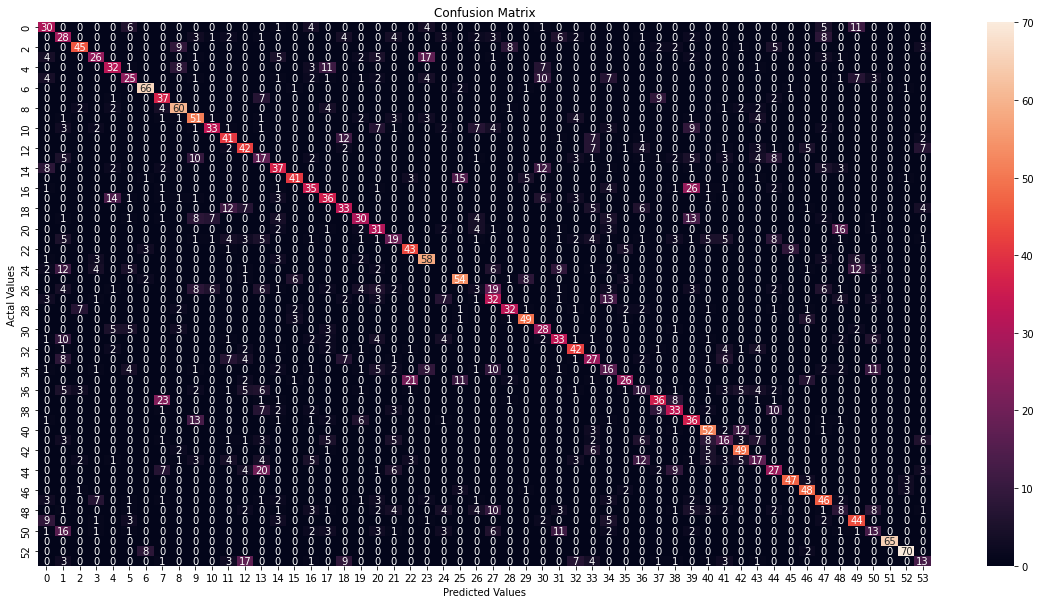

In [24]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_test)
cm_df = pd.DataFrame(confusion_matrix,
                     index = l, 
                     columns = l)
plt.figure(figsize=(20,10))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

## Calculating f1-score, precision score,recall score.

In [33]:
#f1-Score
print('F1 Score: %.3f' % f1_score(y_test, pred_test,average='micro'))
#Precision score
print('Precision: %.3f' % precision_score(y_test, pred_test,average='micro'))
#Recall Score
print('Recall: %.3f' % recall_score(y_test, pred_test,average='micro'))


F1 Score: 0.512
Precision: 0.512
Recall: 0.512


## Applying Decision Tree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=66,test_size=0.20)
dt.fit(x_train,y_train)
dt_pred_train=dt.predict(x_train)
dt_pred_test=dt.predict(x_test)
dt_acc_train=round(accuracy_score(y_train,dt_pred_train)*100,1)
dt_acc_test=round(accuracy_score(y_test,dt_pred_test)*100,1)
print("acc train",dt_acc_train)
print("acc test",dt_acc_test)

acc train 100.0
acc test 80.5


## Cross Validation Score

In [56]:
for i in range(18,30):
    cv_score=cross_val_score(dt,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",dt_acc_test)



At cv- 18

 cross validation score is- 69.14819704135522

 Accuracy score is- 80.5


At cv- 19

 cross validation score is- 69.4322548697446

 Accuracy score is- 80.5


At cv- 20

 cross validation score is- 69.76606185507579

 Accuracy score is- 80.5


At cv- 21

 cross validation score is- 70.03671434051182

 Accuracy score is- 80.5


At cv- 22

 cross validation score is- 71.20721068284544

 Accuracy score is- 80.5


At cv- 23

 cross validation score is- 71.65595687708253

 Accuracy score is- 80.5


At cv- 24

 cross validation score is- 71.70091580791663

 Accuracy score is- 80.5


At cv- 25

 cross validation score is- 71.51600428434524

 Accuracy score is- 80.5


At cv- 26

 cross validation score is- 71.35133491712006

 Accuracy score is- 80.5


At cv- 27

 cross validation score is- 71.30192936745642

 Accuracy score is- 80.5


At cv- 28

 cross validation score is- 73.18607286571861

 Accuracy score is- 80.5


At cv- 29

 cross validation score is- 72.71993233453678

 Accur

So we are getting the least difference between cross_val_score and accuracy score at cv=28

In [39]:
cv_score_best_dt=cross_val_score(dt,x,y,cv=28).mean()*100
print("cross validation score is-",cv_score_best_dt)
print("accuracy score for decision tree classifier model is-",dt_acc_test)

cross validation score is- 73.15313964493374
accuracy score for decision tree classifier model is- 80.7


## Confusion Matrix

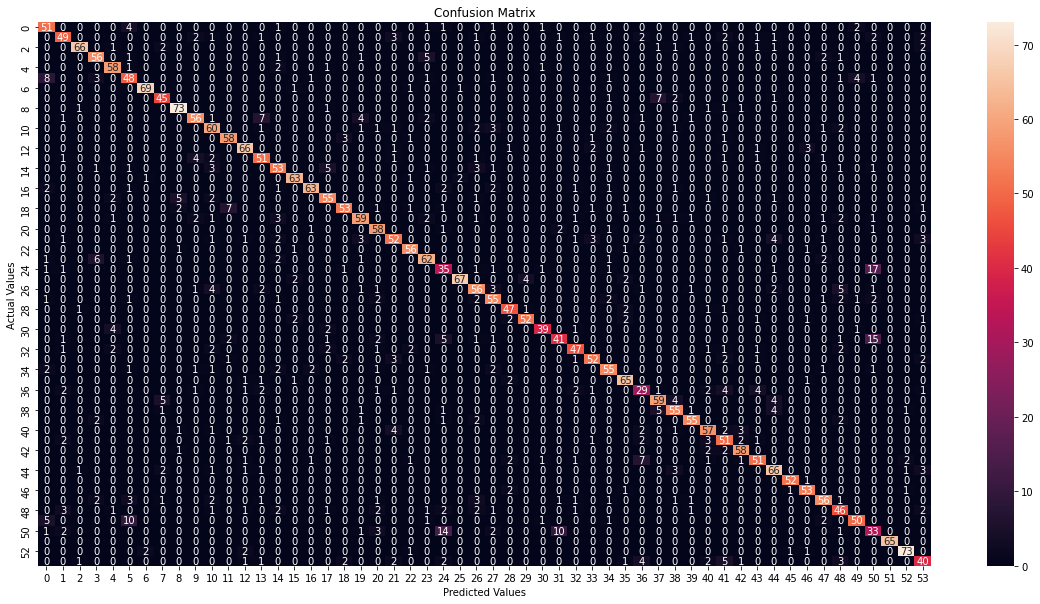

In [57]:
confusion_matrix = metrics.confusion_matrix(y_test,dt_pred_test)
cm_df = pd.DataFrame(confusion_matrix,
                     index = l, 
                     columns = l)
plt.figure(figsize=(20,10))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

##  Calculating f1-score, precision score,recall score.

In [58]:
#f1-Score
print('F1 Score: %.3f' % f1_score(y_test, dt_pred_test,average='micro'))
#Precision score
print('Precision: %.3f' % precision_score(y_test, dt_pred_test,average='micro'))
#Recall Score
print('Recall: %.3f' % recall_score(y_test, dt_pred_test,average='micro'))


F1 Score: 0.805
Precision: 0.805
Recall: 0.805


## Applying Knn Classifier

In [45]:
from sklearn.neighbors import KNeighborsClassifier
max_ac=0
randomState=0
knn=KNeighborsClassifier()
for i in range(40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.25)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    
    print("\n\nAt random state:",i)
    print("\nTrain Accuracy- ",round(accuracy_score(y_train,pred_train)*100,1))
    print("\nTest Accuracy- ",round(accuracy_score(y_test,pred_test)*100,1))
        
print("\n\n Best accuracy at random state-",randomState)



At random state: 0

Train Accuracy-  91.6

Test Accuracy-  84.4


At random state: 1

Train Accuracy-  91.5

Test Accuracy-  85.4


At random state: 2

Train Accuracy-  91.3

Test Accuracy-  85.6


At random state: 3

Train Accuracy-  91.3

Test Accuracy-  84.9


At random state: 4

Train Accuracy-  91.7

Test Accuracy-  84.9


At random state: 5

Train Accuracy-  91.4

Test Accuracy-  85.6


At random state: 6

Train Accuracy-  91.6

Test Accuracy-  86.0


At random state: 7

Train Accuracy-  91.5

Test Accuracy-  84.9


At random state: 8

Train Accuracy-  91.4

Test Accuracy-  85.2


At random state: 9

Train Accuracy-  91.6

Test Accuracy-  85.0


At random state: 10

Train Accuracy-  91.3

Test Accuracy-  85.2


At random state: 11

Train Accuracy-  91.4

Test Accuracy-  84.4


At random state: 12

Train Accuracy-  91.5

Test Accuracy-  84.9


At random state: 13

Train Accuracy-  91.5

Test Accuracy-  85.1


At random state: 14

Train Accuracy-  91.3

Test Accuracy-  85.3


At 

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=26,test_size=0.20)
knn.fit(x_train,y_train)
pred_train=knn.predict(x_train)
pred_test=knn.predict(x_test)
knn_train_acc=round(accuracy_score(y_train,pred_train)*100,1)
knn_test_acc=round(accuracy_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",knn_train_acc)
print("\nTest Accuracy- ",knn_test_acc)


Train Accuracy-  91.5

Test Accuracy-  86.9


## Cross Validation Score

In [49]:
for i in range(29,40):
    cv_score=cross_val_score(knn,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",knn_test_acc)



At cv- 29

 cross validation score is- 76.98786877285865

 Accuracy score is- 86.9


At cv- 30

 cross validation score is- 78.0345349724887

 Accuracy score is- 86.9


At cv- 31

 cross validation score is- 78.86798347138846

 Accuracy score is- 86.9


At cv- 32

 cross validation score is- 77.7708871017298

 Accuracy score is- 86.9


At cv- 33

 cross validation score is- 78.3056605841416

 Accuracy score is- 86.9


At cv- 34

 cross validation score is- 80.04659172098756

 Accuracy score is- 86.9


At cv- 35

 cross validation score is- 77.90274271510623

 Accuracy score is- 86.9


At cv- 36

 cross validation score is- 78.39872873317691

 Accuracy score is- 86.9


At cv- 37

 cross validation score is- 79.22378447626659

 Accuracy score is- 86.9


At cv- 38

 cross validation score is- 80.2922228909071

 Accuracy score is- 86.9


At cv- 39

 cross validation score is- 77.97147336761897

 Accuracy score is- 86.9


So we are getting the least difference between cross_val_score and accuracy score at cv=34

In [50]:
cv_score_best_knn=cross_val_score(knn,x,y,cv=34).mean()*100
print("cross validation score is-",cv_score_best_knn)
print("accuracy score for Knn classifier model is-",knn_test_acc)

cross validation score is- 80.04659172098756
accuracy score for Knn classifier model is- 86.9


## Confusion Matrix

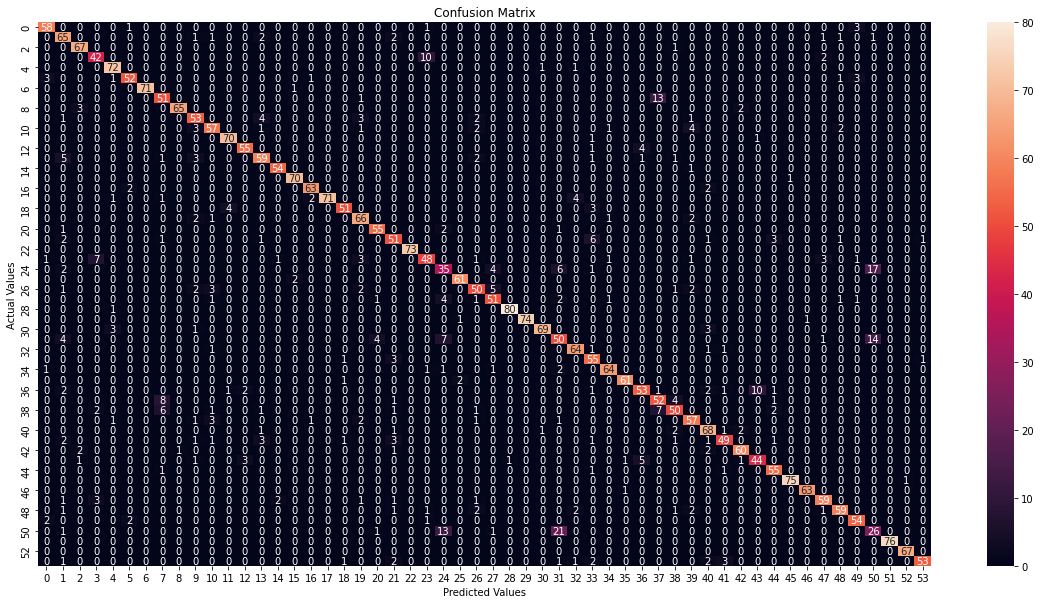

In [52]:
confusion_matrix = metrics.confusion_matrix(y_test,pred_test)
cm_df = pd.DataFrame(confusion_matrix,
                     index = l, 
                     columns = l)
plt.figure(figsize=(20,10))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

 ## Calculating f1-score, precision score,recall score.

In [54]:
#f1-Score
print('F1 Score: %.3f' % f1_score(y_test, pred_test,average='micro'))
#Precision score
print('Precision: %.3f' % precision_score(y_test, pred_test,average='micro'))
#Recall Score
print('Recall: %.3f' % recall_score(y_test, pred_test,average='micro'))

F1 Score: 0.869
Precision: 0.869
Recall: 0.869


## Applying Random Forest Classification 

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
max_ac=0
randomState=0

for i in range(40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.25)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    
    print("\n\nAt random state:",i)
    print("\nTrain Accuracy- ",round(accuracy_score(y_train,pred_train)*100,1))
    print("\nTest Accuracy- ",round(accuracy_score(y_test,pred_test)*100,1))
        
print("\n\n Best accuracy at random state-",randomState)



At random state: 0

Train Accuracy-  100.0

Test Accuracy-  91.6


At random state: 1

Train Accuracy-  100.0

Test Accuracy-  91.8


At random state: 2

Train Accuracy-  100.0

Test Accuracy-  91.5


At random state: 3

Train Accuracy-  100.0

Test Accuracy-  92.1


At random state: 4

Train Accuracy-  100.0

Test Accuracy-  91.9


At random state: 5

Train Accuracy-  100.0

Test Accuracy-  91.7


At random state: 6

Train Accuracy-  100.0

Test Accuracy-  92.5


At random state: 7

Train Accuracy-  100.0

Test Accuracy-  91.5


At random state: 8

Train Accuracy-  100.0

Test Accuracy-  91.8


At random state: 9

Train Accuracy-  100.0

Test Accuracy-  91.8


At random state: 10

Train Accuracy-  100.0

Test Accuracy-  91.7


At random state: 11

Train Accuracy-  100.0

Test Accuracy-  91.5


At random state: 12

Train Accuracy-  100.0

Test Accuracy-  92.2


At random state: 13

Train Accuracy-  100.0

Test Accuracy-  91.7


At random state: 14

Train Accuracy-  100.0

Test Accura

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=6,test_size=0.20)
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
rf_train_acc=round(accuracy_score(y_train,pred_train)*100,1)
rf_test_acc=round(accuracy_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",rf_train_acc)
print("\nTest Accuracy- ",rf_test_acc)


Train Accuracy-  100.0

Test Accuracy-  92.7


## Cross Validation Score

In [61]:
for i in range(18,30):
    cv_score=cross_val_score(rf,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",rf_test_acc)



At cv- 18

 cross validation score is- 83.2583655520097

 Accuracy score is- 92.7


At cv- 19

 cross validation score is- 83.64647799258812

 Accuracy score is- 92.7


At cv- 20

 cross validation score is- 83.64635575796008

 Accuracy score is- 92.7


At cv- 21

 cross validation score is- 84.36626664474767

 Accuracy score is- 92.7


At cv- 22

 cross validation score is- 84.5448732092533

 Accuracy score is- 92.7


At cv- 23

 cross validation score is- 85.42687404284807

 Accuracy score is- 92.7


At cv- 24

 cross validation score is- 84.94506017013626

 Accuracy score is- 92.7


At cv- 25

 cross validation score is- 84.82085048010974

 Accuracy score is- 92.7


At cv- 26

 cross validation score is- 84.76039051316128

 Accuracy score is- 92.7


At cv- 27

 cross validation score is- 85.51646496375841

 Accuracy score is- 92.7


At cv- 28

 cross validation score is- 86.30492123625623

 Accuracy score is- 92.7


At cv- 29

 cross validation score is- 86.25473923648364

 Accura

So we are getting the least difference between cross_val_score and accuracy score at cv=28

In [62]:
cv_score_best_rf=cross_val_score(rf,x,y,cv=28).mean()*100
print("cross validation score is-",cv_score_best_rf)
print("accuracy score for random forest classifier model is-",rf_test_acc)

cross validation score is- 86.26078028678322
accuracy score for random forest classifier model is- 92.7


## Confusion Matrix

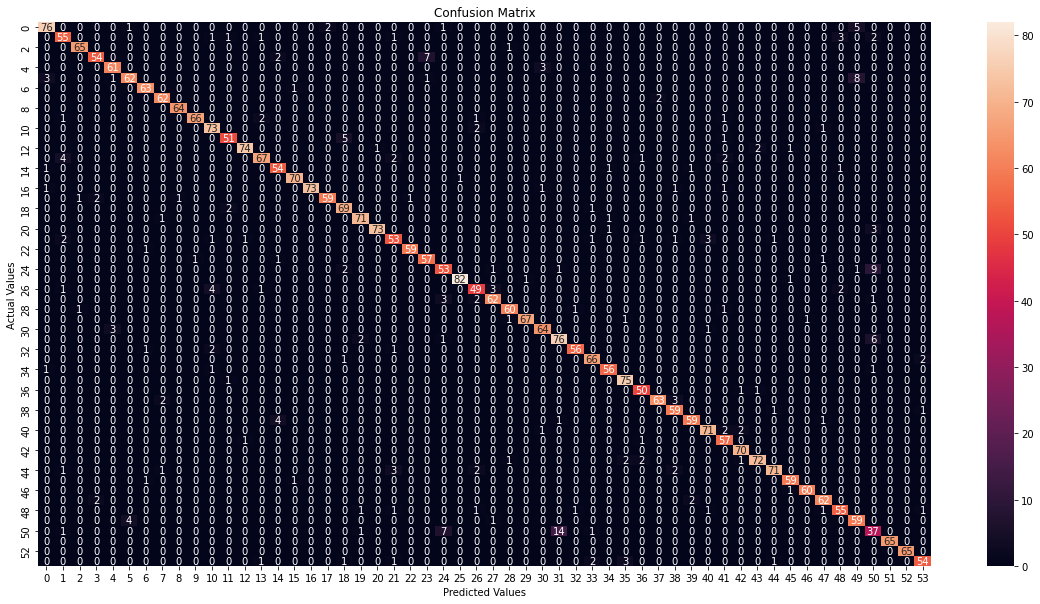

In [63]:
confusion_matrix = metrics.confusion_matrix(y_test,pred_test)
cm_df = pd.DataFrame(confusion_matrix,
                     index = l, 
                     columns = l)
plt.figure(figsize=(20,10))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

## Calculating f1-score, precision score,recall score.

In [64]:
#f1-Score
print('F1 Score: %.3f' % f1_score(y_test, pred_test,average='micro'))
#Precision score
print('Precision: %.3f' % precision_score(y_test, pred_test,average='micro'))
#Recall Score
print('Recall: %.3f' % recall_score(y_test, pred_test,average='micro'))

F1 Score: 0.927
Precision: 0.927
Recall: 0.927


## Summary of all models

In [65]:
models=['Logistic Regression','Decision Tree Classifier','Knn Classifier','Random Forest Classifier']
test_acc=[test_accuracy,dt_acc_test,knn_test_acc,rf_test_acc]
cv_score=[cv_score_best,cv_score_best_dt,cv_score_best_knn,cv_score_best_rf]
df=pd.DataFrame(list(zip(models,test_acc,cv_score)),columns=['Models','Test Accuracy','CV Score'])
df

,Models,Test Accuracy,CV Score
0,Logistic Regression,51.2,45.877387
1,Decision Tree Classifier,80.5,73.153140
2,Knn Classifier,86.9,80.046592
3,Random Forest Classifier,92.7,86.260780


## We will select Random Forest Classifier as our final model as it has highest accuracy score, f1 score,precision score and recall score.

## hyperparameter tuning

In [66]:
param_grid = {
    "n_estimators":[100,200,300],
    "max_depth":[10, 50, 100],
    "max_features":[6,8,10,12,14,16],
    'bootstrap': [True, False]
}

rf_reg = RandomForestClassifier()

rf_reg_tuned = GridSearchCV(estimator=rf_reg,
                            param_grid=param_grid,
                            cv=3,
                            n_jobs=-1,
                            verbose=2)

rf_reg_tuned.fit(x_train, y_train)
rf_reg_tuned.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits


RandomForestClassifier(max_depth=100, max_features=6, n_estimators=300)

In [68]:
rf1=RandomForestClassifier(n_estimators=300,max_depth=100,max_features=6,bootstrap=True)
rf1.fit(x_train,y_train)
pred_train=rf1.predict(x_train)
pred_test=rf1.predict(x_test)
train_acc=round(accuracy_score(y_train,pred_train)*100,1)
test_acc=round(accuracy_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",train_acc)
print("\nTest Accuracy- ",test_acc)


Train Accuracy-  100.0

Test Accuracy-  91.3


Accuracy didnot increase so we will stick to our model previous to hyperparameter tuning.Lets save it.

## Model Saving

In [69]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(rf, open(filename, 'wb'))

## Part2- Considering AveragePrice as a Label and others as feature

## Relation of features with average price

In [70]:
df2=pd.read_csv(r"C:\Users\user\Downloads\avocado\avocado.csv")
df2.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [71]:
#droping unnamed:0
df2=df2.drop(['Unnamed: 0'],axis=1)

Text(0.5, 1.0, 'Average Price distribution in Each Region based on year')

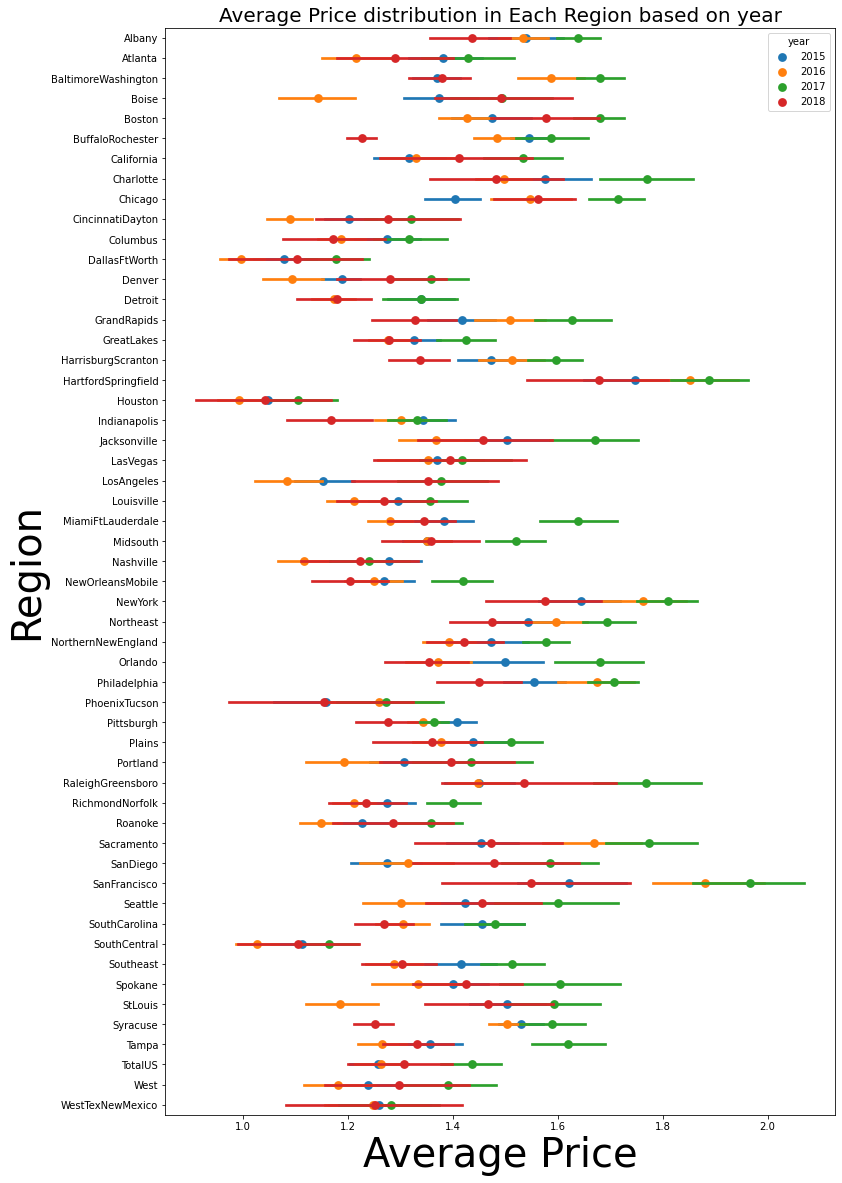

In [73]:
#Analysing average price and year
plt.figure(figsize=(12,20))
sns.pointplot(x='AveragePrice',y='region',data=df2, hue='year',join=False)
plt.xlabel('Average Price',fontsize=40)
plt.ylabel('Region',fontsize=40)
plt.title("Average Price distribution in Each Region based on year",{'fontsize':20})

Observation: Average price is maximum in HartfordSpringFeild among all the years and avg price is minimum in Houston

Text(0.5, 1.0, 'Average Price distribution in Each Region based on year')

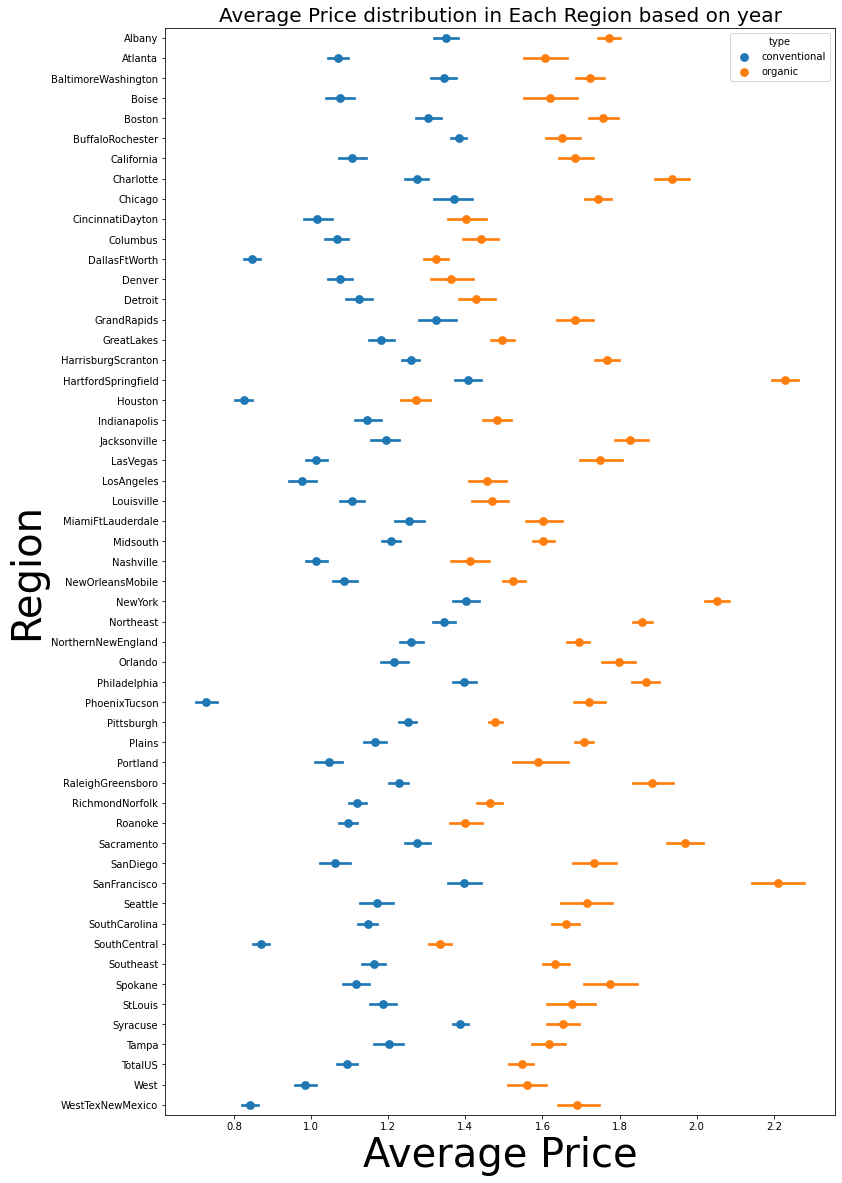

In [74]:
#Analysing average price and type
plt.figure(figsize=(12,20))
sns.pointplot(x='AveragePrice',y='region',data=df2, hue='type',join=False)
plt.xlabel('Average Price',fontsize=40)
plt.ylabel('Region',fontsize=40)
plt.title("Average Price distribution in Each Region based on year",{'fontsize':20})

Observation: We could observe that rates of Organic is always higher then conventional. HartfordSpringFeild has costliest organic avocados, Houstan sells cheapest organic avocados. HartfordSpringFeild, NewYork and Philadelphia sells costliest conventional avocados and Phoenix Tuscon sells cheapest conventional avocados.

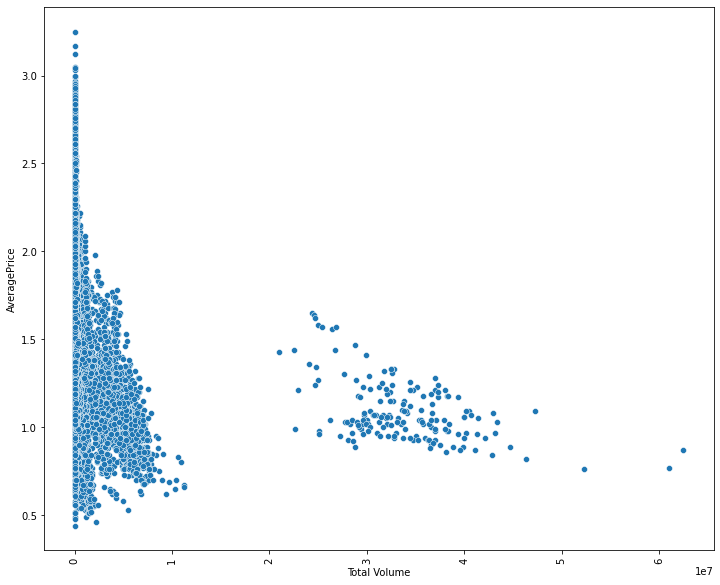

In [88]:
#Relation between AveragePrice and total volume
plt.figure(figsize=(12,10))
a=sns.scatterplot(x=df2['Total Volume'],y=df2['AveragePrice'],data=df2)
plt.xlabel('Total Volume')
plt.ylabel('AveragePrice')
plt.xticks(rotation=90)
plt.show()

Observation: less number of avocados are sold if the average price is high.

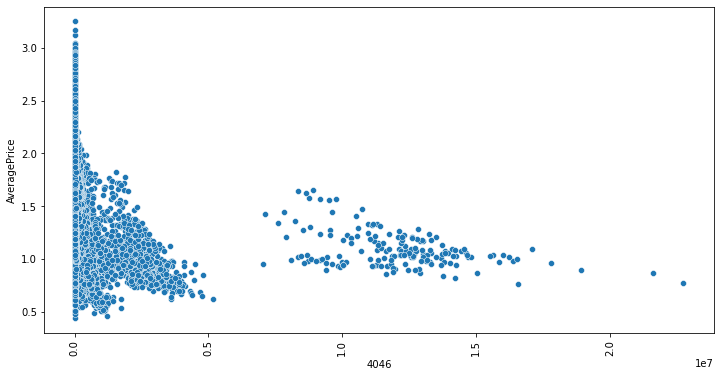

In [82]:
#Relation between AveragePrice and 4046
plt.figure(figsize=(12,6))
a=sns.scatterplot(x=df2['4046'],y=df2['AveragePrice'],data=df2)
plt.xlabel('4046')
plt.ylabel('AveragePrice')
plt.xticks(rotation=90)
plt.show()

Obersvation: Lower the average price higher the number of avocados sold.

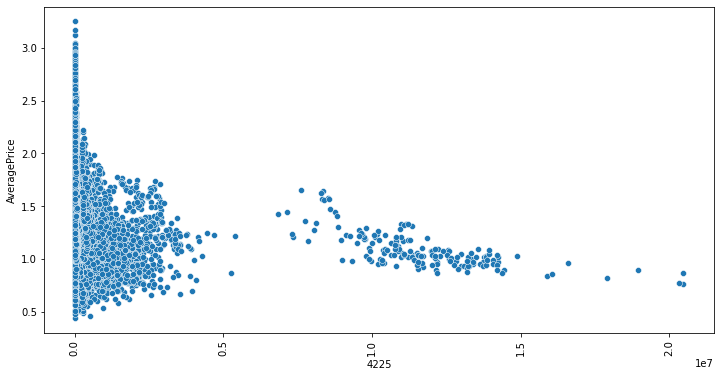

In [83]:
#Relation between AveragePrice and 4225
plt.figure(figsize=(12,6))
a=sns.scatterplot(x=df2['4225'],y=df2['AveragePrice'],data=df2)
plt.xlabel('4225')
plt.ylabel('AveragePrice')
plt.xticks(rotation=90)
plt.show()

Observation: Lower the average price higher the number of avocados sold.Most of the 4225 avocados sold ar less then 0.51e7 and there average price range between 0.5 to 2

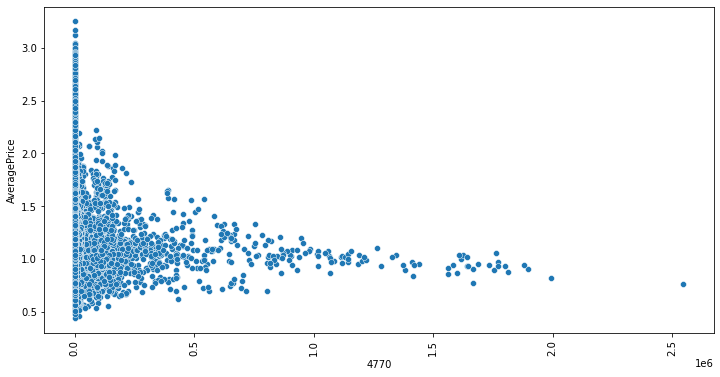

In [85]:
#Relation between AveragePrice and 4770
plt.figure(figsize=(12,6))
a=sns.scatterplot(x=df2['4770'],y=df2['AveragePrice'],data=df2)
plt.xlabel('4770')
plt.ylabel('AveragePrice')
plt.xticks(rotation=90)
plt.show()

Observation:Lower the average price higher the number of avocados sold.Most of the 4770 avocados sold are less then 0.71e7 and there average price range between 0.5 to 2.2

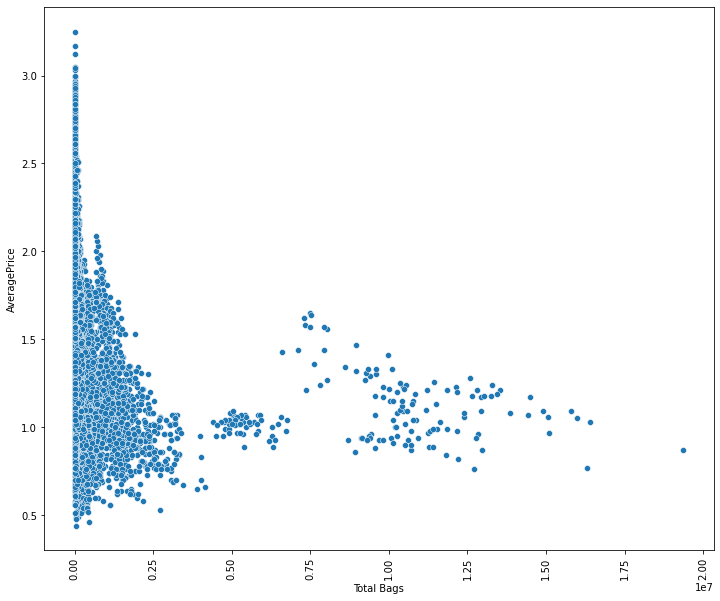

In [87]:
#Relation between AveragePrice and total bags
plt.figure(figsize=(12,10))
a=sns.scatterplot(x=df2['Total Bags'],y=df2['AveragePrice'],data=df2)
plt.xlabel('Total Bags')
plt.ylabel('AveragePrice')
plt.xticks(rotation=90)
plt.show()

Observation: Most of the total bags sold are of average price 0.5 to 1.7

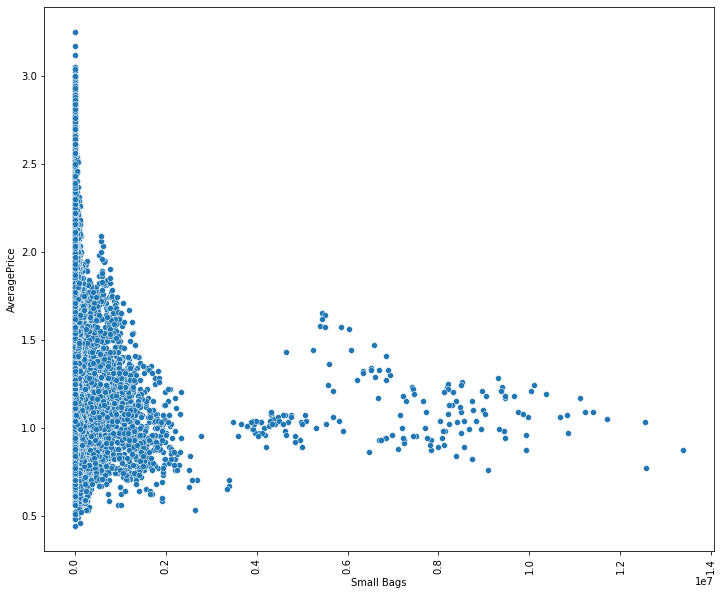

In [90]:
#Relation between AveragePrice and Small Bags
plt.figure(figsize=(12,10))
a=sns.scatterplot(x=df2['Small Bags'],y=df2['AveragePrice'],data=df2)
plt.xlabel('Small Bags')
plt.ylabel('AveragePrice')
plt.xticks(rotation=90)
plt.show()

Observation:Distribution of Small bags and total bags are almost same. Most of the Small bags sold are of average price 0.5 to 2

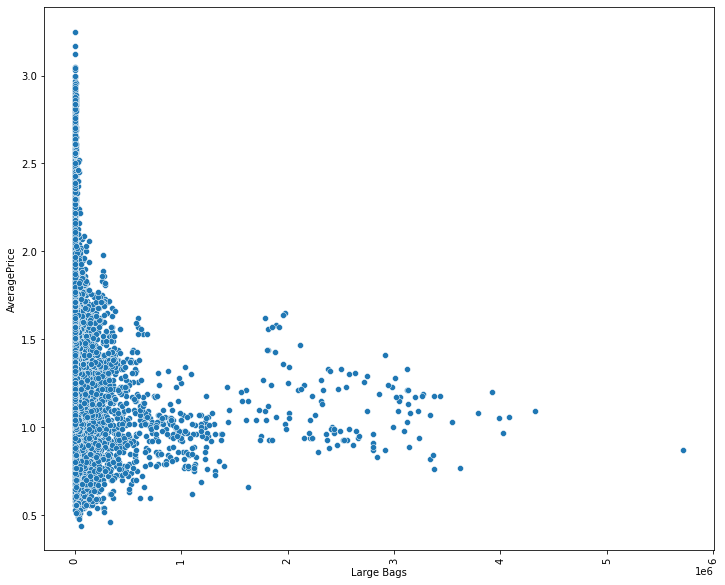

In [91]:
#Relation between AveragePrice and Large Bags
plt.figure(figsize=(12,10))
a=sns.scatterplot(x=df2['Large Bags'],y=df2['AveragePrice'],data=df2)
plt.xlabel('Large Bags')
plt.ylabel('AveragePrice')
plt.xticks(rotation=90)
plt.show()

Observation:Distribution of Large bags and total bags are almost same. Most of the Large bags sold are of average price 0.5 to 2

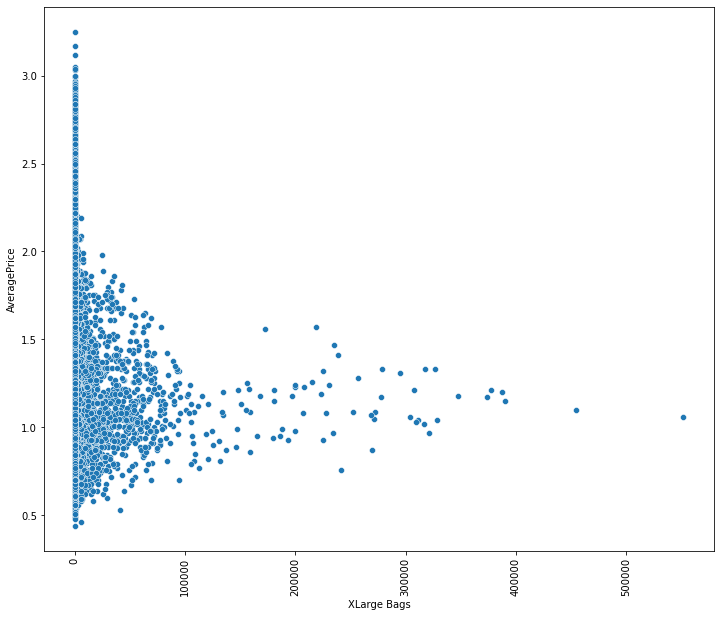

In [92]:
#Relation between AveragePrice and XLarge Bags
plt.figure(figsize=(12,10))
a=sns.scatterplot(x=df2['XLarge Bags'],y=df2['AveragePrice'],data=df2)
plt.xlabel('XLarge Bags')
plt.ylabel('AveragePrice')
plt.xticks(rotation=90)
plt.show()

Observation:Sale of XLarge Bags are comparatively less then Small Bags and Large Bags. Most of the bags sold are of average price 0.6 to 1.7

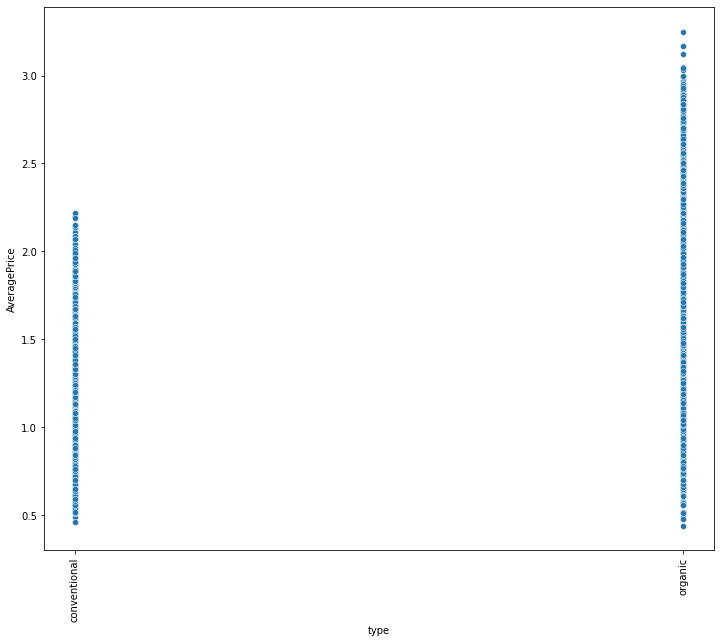

In [94]:
#Relation between AveragePrice and type
plt.figure(figsize=(12,10))
a=sns.scatterplot(x=df2['type'],y=df2['AveragePrice'],data=df2)
plt.xlabel('type')
plt.ylabel('AveragePrice')
plt.xticks(rotation=90)
plt.show()

Observation: Prices of Organic type avocados are way higher then that of conventional.

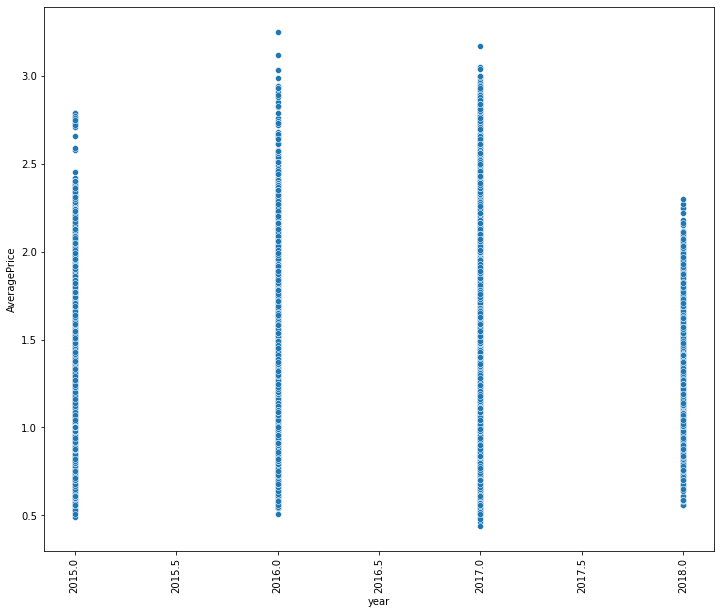

In [95]:
#Relation between AveragePrice and year
plt.figure(figsize=(12,10))
a=sns.scatterplot(x=df2['year'],y=df2['AveragePrice'],data=df2)
plt.xlabel('year')
plt.ylabel('AveragePrice')
plt.xticks(rotation=90)
plt.show()

Observation: We could observe that the prices are heighest in year 2016 and lowerst in 2018.

## Encoding

In [97]:
#Using ordinal encoder
oe=OrdinalEncoder()
df1=oe.fit_transform(df2[['Date']])
df2['Date']=df1
df4=oe.fit_transform(df2[['type']])
df2['type']=df4
df3=oe.fit_transform(df2[['region']])
df2['region']=df3
df2.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0
1,50.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0
2,49.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0
3,48.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0
4,47.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0


## Checking relation between features and label

In [98]:
df2.corr().abs()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,1.000000,0.145514,0.009263,0.005028,0.016895,0.047517,0.064688,0.056902,0.081855,0.077374,0.000060,0.950274,0.000101
AveragePrice,0.145514,1.000000,0.192752,0.208317,0.172928,0.179446,0.177088,0.174730,0.172940,0.117592,0.615845,0.093197,0.011716
Total Volume,0.009263,0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.232434,0.017193,0.174176
4046,0.005028,0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.225819,0.003353,0.192073
4225,0.016895,0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,0.232289,0.009559,0.145726
4770,0.047517,0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,0.210027,0.036531,0.095252
Total Bags,0.064688,0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.217788,0.071552,0.175256
Small Bags,0.056902,0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.220535,0.063915,0.164702
Large Bags,0.081855,0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.193177,0.087891,0.198768
XLarge Bags,0.077374,0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.175483,0.081033,0.082281


<AxesSubplot:>

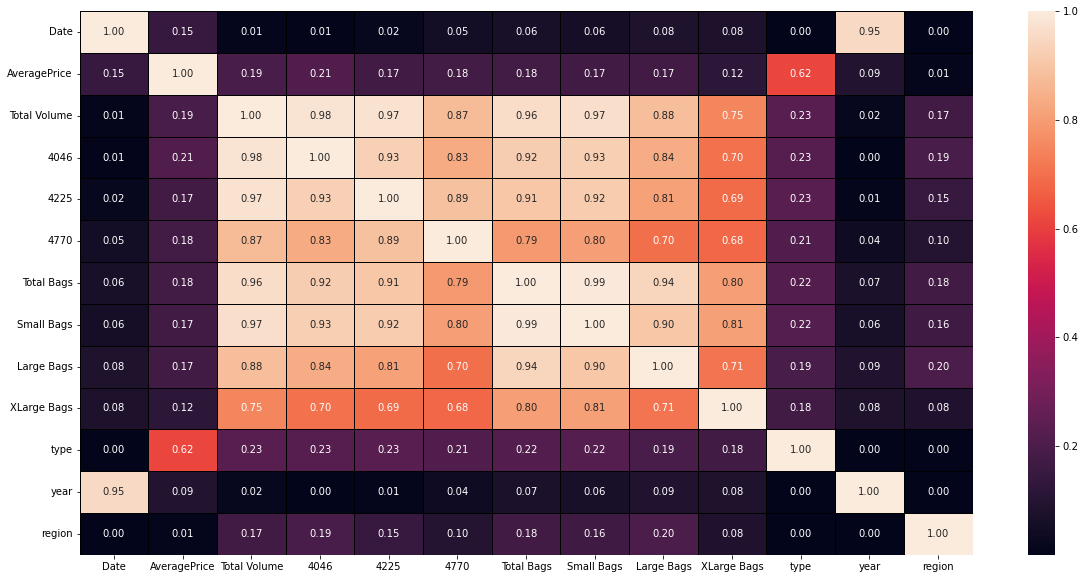

In [99]:
# Plotting heat map for better analysis
plt.figure(figsize=(20,10))
sns.heatmap(df2.corr().abs(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')

Observation: Multicollinearity exists between many features, so we would use VIF to treat it.

## VIF

In [100]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df2.values,i) for i in range(len(df2.columns))]
vif['features']=df2.columns
vif

,vif,features
0,4.317681e+00,Date
1,2.270532e+01,AveragePrice
2,5.226352e+09,Total Volume
3,6.965555e+08,4046
4,6.349903e+08,4225
5,4.986686e+06,4770
6,2.502000e+14,Total Bags
7,1.429714e+14,Small Bags
8,1.521486e+13,Large Bags
9,7.856326e+10,XLarge Bags


## Checking Outliers

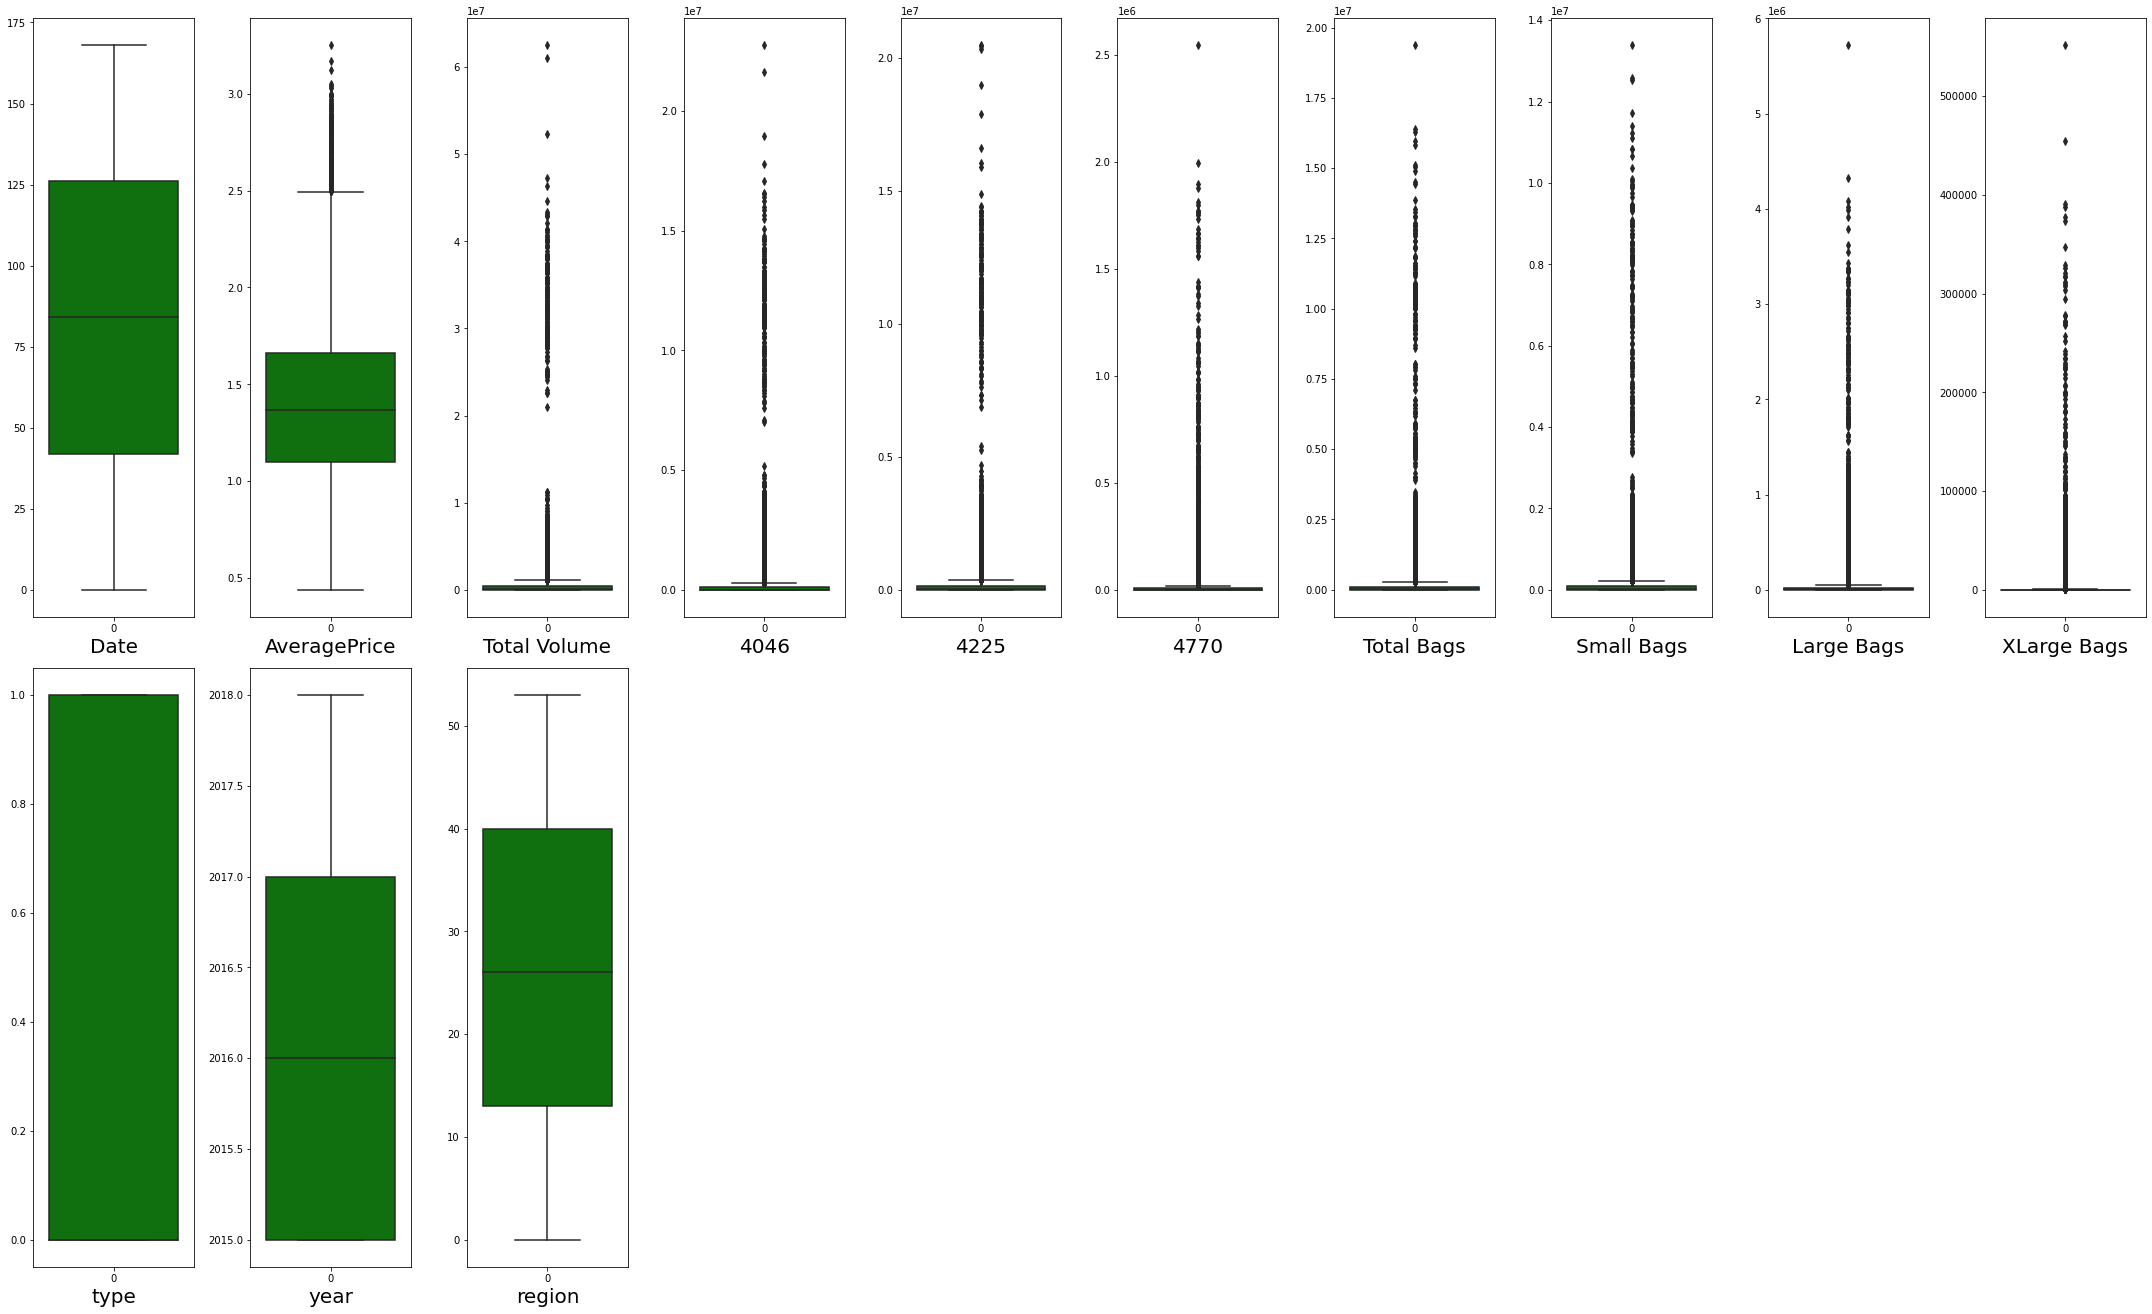

In [101]:
col=df2.columns
plt.figure(figsize=(30,90))
for i in range(len(col)):
    plt.subplot(10,10,i+1)
    sns.boxplot(data=df2[col[i]],color='green',orient='v')
    plt.xlabel(col[i],fontsize=20)
    plt.tight_layout()

Observation: We could see lot many outliers in AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags but we wont consider outliers in AveragePrice as it is a label.

## Checking Skewness

In [102]:
df2.skew()

Date             0.000117
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

Observation:We could see skewness in AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags considering the range of skewness as (-0.5 to 0.5) but we wont consider skewness in average price as it is our label.

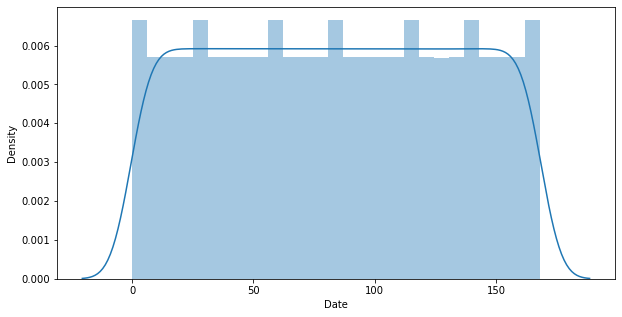

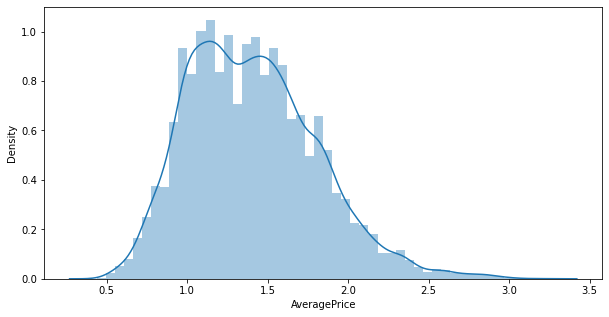

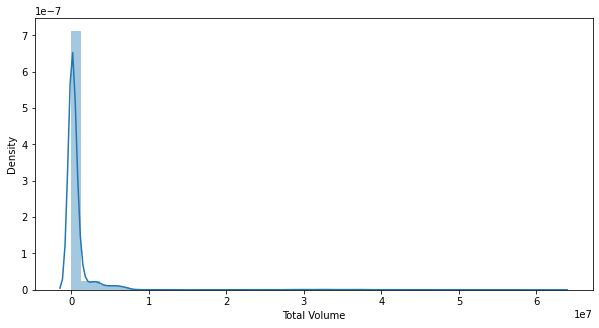

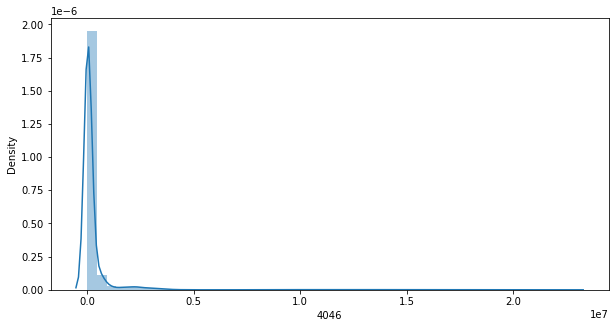

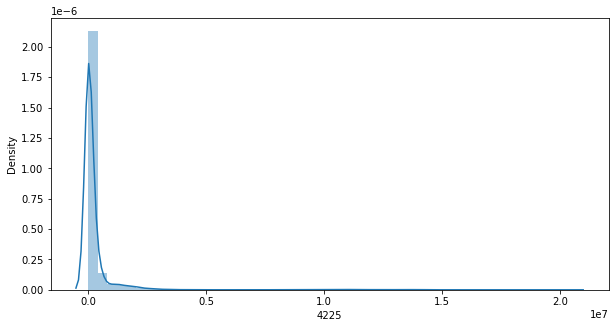

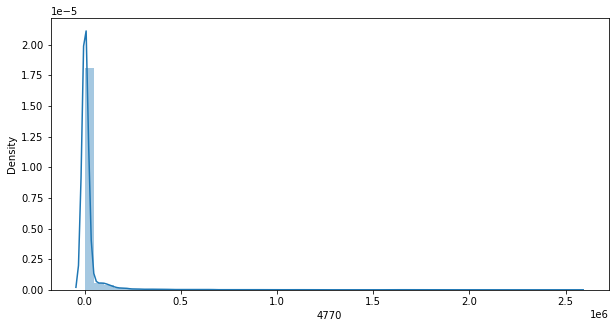

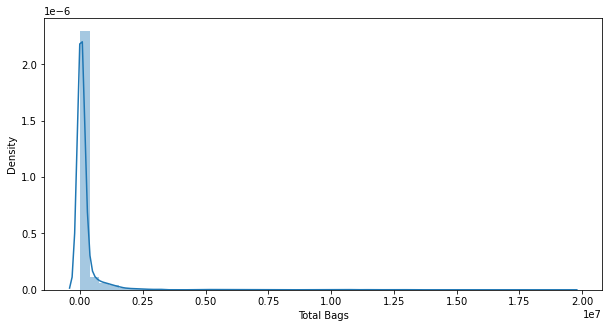

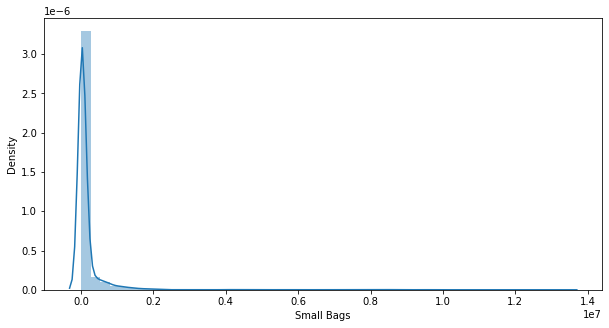

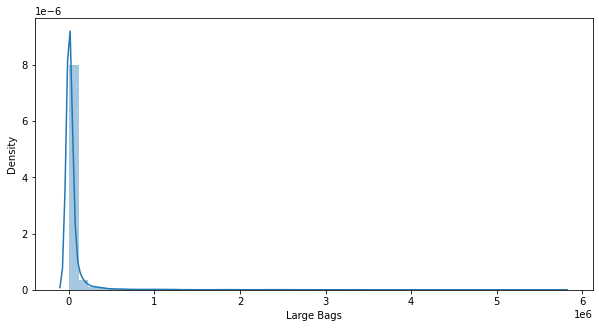

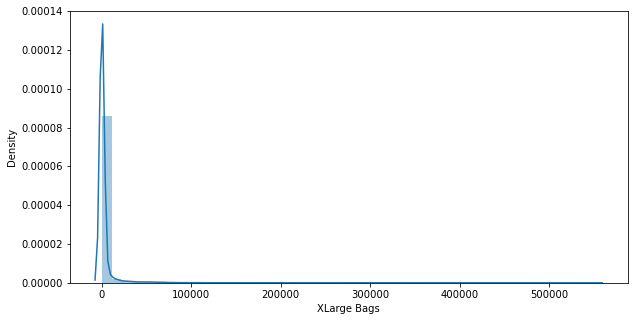

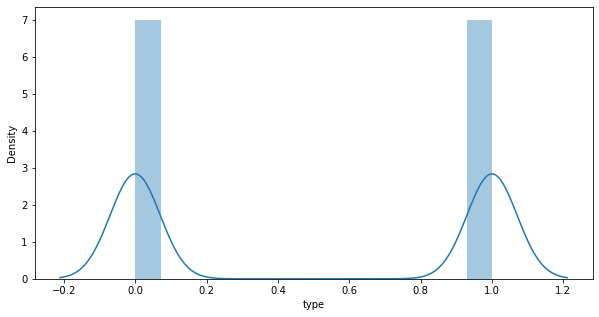

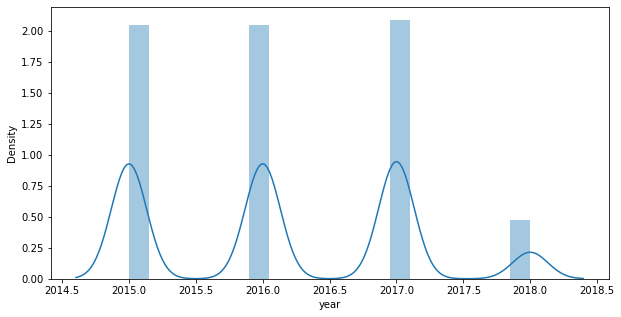

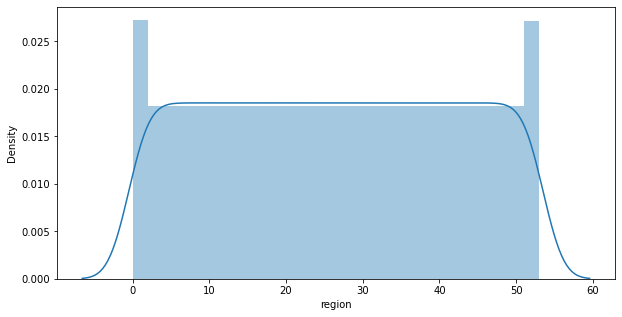

In [103]:
# Ploting Distribution plot to cross check skewness
import warnings
warnings.filterwarnings('ignore')
col=df2.columns
# for feature Length
for i in range(len(df2.columns)):
    plt.figure(figsize=(10,5))
    sns.distplot(df2[col[i]])
    plt.xlabel(col[i],fontsize=10)

Our obervation is correct there is skewness present.

## Treating multicollinearity

Since Total Bags is having highest VIF and it also has lot of outliers and skewness so we will drop it.

In [105]:
df2=df2.drop(['Total Bags'],axis=1)
df2.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51.0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,0.0,2015,0.0
1,50.0,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,0.0,2015,0.0
2,49.0,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,0.0,2015,0.0
3,48.0,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,0.0,2015,0.0
4,47.0,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,0.0,2015,0.0


In [107]:
#Lets check VIF again
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df2.values,i) for i in range(len(df2.columns))]
vif['features']=df2.columns
vif

,vif,features
0,4.317303e+00,Date
1,2.270530e+01,AveragePrice
2,5.226349e+09,Total Volume
3,6.965549e+08,4046
4,6.349897e+08,4225
5,4.986682e+06,4770
6,2.437455e+08,Small Bags
7,2.580870e+07,Large Bags
8,1.332648e+05,XLarge Bags
9,3.388019e+00,type


Observation: Now the highest vif is of Total Volume and it also has lot of outliers and skewness so we will drop it.

In [110]:
df2=df2.drop(['Total Volume'],axis=1)
df2.head()

,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51.0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0.0,2015,0.0
1,50.0,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0.0,2015,0.0
2,49.0,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0.0,2015,0.0
3,48.0,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0.0,2015,0.0
4,47.0,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0.0,2015,0.0


In [111]:
#Lets check VIF again
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df2.values,i) for i in range(len(df2.columns))]
vif['features']=df2.columns
vif

,vif,features
0,4.305792,Date
1,22.700568,AveragePrice
2,10.790675,4046
3,14.359143,4225
4,5.644944,4770
5,20.638218,Small Bags
6,5.904739,Large Bags
7,3.527573,XLarge Bags
8,3.382137,type
9,20.035922,year


In [112]:
df2=df2.drop(['year'],axis=1)
df2.head()

,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region
0,51.0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0.0,0.0
1,50.0,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0.0,0.0
2,49.0,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0.0,0.0
3,48.0,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0.0,0.0
4,47.0,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0.0,0.0


In [113]:
#Lets check VIF again
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df2.values,i) for i in range(len(df2.columns))]
vif['features']=df2.columns
vif

,vif,features
0,4.037197,Date
1,9.318673,AveragePrice
2,10.741408,4046
3,14.328394,4225
4,5.596970,4770
5,20.635070,Small Bags
6,5.902843,Large Bags
7,3.523306,XLarge Bags
8,3.102612,type
9,3.607564,region


## Treating Outliers

In [114]:
x=df2.drop(['AveragePrice'],axis=1)

In [115]:
y=df2['AveragePrice']

In [116]:
#Getting sure of outliers using z score

z=np.abs(zscore(x))
i=np.where(z>3)
print("Outliers index-\n",set(i[0]))
print("\n\nNumber of rows to be eliminated-\n",len(set(i[0])))

Outliers index-
 {4131, 4132, 4133, 8319, 8320, 8321, 8322, 8323, 8324, 8325, 8326, 8327, 8328, 8329, 8330, 8331, 8332, 8333, 8334, 8335, 8336, 8337, 8338, 8339, 8340, 8341, 8342, 8343, 8344, 8345, 8346, 8347, 8348, 8349, 8350, 8351, 8352, 8353, 8354, 8355, 8356, 8357, 8358, 8359, 8360, 8361, 8362, 8363, 8364, 8365, 8366, 8367, 8368, 8369, 8370, 8371, 8372, 8373, 8374, 8375, 8376, 8378, 8379, 8380, 8381, 8391, 8392, 8393, 8394, 8395, 8396, 8397, 8398, 8399, 8400, 8401, 8402, 8403, 8404, 8405, 8406, 8407, 8408, 8409, 8410, 8411, 8413, 8414, 8415, 8416, 8417, 8418, 8419, 8420, 8421, 8422, 8423, 8424, 4339, 4340, 4341, 4349, 4362, 6411, 6430, 6431, 6432, 6434, 6435, 2340, 6437, 2341, 6439, 6436, 2348, 6445, 2351, 6448, 6455, 2368, 2370, 346, 8550, 359, 8551, 8552, 8553, 8554, 8555, 8556, 8557, 8558, 8559, 8560, 8561, 8658, 8659, 8660, 8661, 8662, 8664, 8665, 8667, 8669, 8742, 8744, 2652, 2653, 2654, 2655, 2656, 2657, 2658, 2659, 2660, 2661, 2662, 2663, 2664, 2665, 2666, 2667, 2668, 2669, 

In [117]:
#Calculating Data Loss
loss=((18249-467)/18249)*100
print("The data loss-",100-loss,"%")

The data loss- 2.559044331196219 %


We could bear with 2% data loss. So we will drop outliers rows.

In [118]:
#removing rows with outliers
df2=df2.drop(df2.index[i[0]])
df2.shape

(17782, 10)

## Splitting data into features and label

In [119]:
x=df2.drop(['AveragePrice'],axis=1)
y=df2['AveragePrice']

In [130]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17782, dtype: float64

## Treating skewness

In [120]:
#using yeo-johnson transformation
x=power_transform(x,method='yeo-johnson')
x

array([[-0.57480701, -0.64991752,  0.35827836, ..., -0.67570236,
        -1.02644331, -2.00919747],
       [-0.59706729, -0.77006683,  0.27635525, ..., -0.67570236,
        -1.02644331, -2.00919747],
       [-0.61945441, -0.72450758,  0.65600965, ..., -0.67570236,
        -1.02644331, -2.00919747],
       ...,
       [ 1.41069827, -0.61035022, -0.77439502, ..., -0.67570236,
         0.97423793,  1.57633722],
       [ 1.39465547, -0.53921073, -0.7116048 , ..., -0.67570236,
         0.97423793,  1.57633722],
       [ 1.37858342, -0.35150339, -0.78720881, ..., -0.67570236,
         0.97423793,  1.57633722]])

## Standardization of data

In [121]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-0.57480701, -0.64991752,  0.35827836, ..., -0.67570236,
        -1.02644331, -2.00919747],
       [-0.59706729, -0.77006683,  0.27635525, ..., -0.67570236,
        -1.02644331, -2.00919747],
       [-0.61945441, -0.72450758,  0.65600965, ..., -0.67570236,
        -1.02644331, -2.00919747],
       ...,
       [ 1.41069827, -0.61035022, -0.77439502, ..., -0.67570236,
         0.97423793,  1.57633722],
       [ 1.39465547, -0.53921073, -0.7116048 , ..., -0.67570236,
         0.97423793,  1.57633722],
       [ 1.37858342, -0.35150339, -0.78720881, ..., -0.67570236,
         0.97423793,  1.57633722]])

## Train test split

In [125]:
from sklearn.linear_model import LinearRegression
max_ac=0
randomState=0
lr=LinearRegression()
for i in range(500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("\n\nAt random state:",i)
        print("\nTrain Accuracy- ",round(r2_score(y_train,pred_train)*100,1))
        print("\nTest Accuracy- ",round(r2_score(y_test,pred_test)*100,1))
        if round(r2_score(y_test,pred_test)*100,1)>max_ac:
            randomState=i
            max_ac=round(r2_score(y_test,pred_test)*100,1)
print("\n\n Best accuracy at random state-",randomState)



At random state: 26

Train Accuracy-  49.0

Test Accuracy-  49.0


At random state: 46

Train Accuracy-  49.0

Test Accuracy-  49.0


At random state: 97

Train Accuracy-  49.0

Test Accuracy-  49.0


At random state: 123

Train Accuracy-  49.0

Test Accuracy-  49.0


At random state: 136

Train Accuracy-  49.0

Test Accuracy-  49.0


At random state: 141

Train Accuracy-  49.0

Test Accuracy-  49.0


At random state: 155

Train Accuracy-  49.0

Test Accuracy-  49.0


At random state: 156

Train Accuracy-  49.0

Test Accuracy-  49.0


At random state: 163

Train Accuracy-  49.0

Test Accuracy-  49.0


At random state: 164

Train Accuracy-  49.0

Test Accuracy-  49.0


At random state: 180

Train Accuracy-  49.0

Test Accuracy-  49.0


At random state: 213

Train Accuracy-  49.0

Test Accuracy-  49.0


At random state: 241

Train Accuracy-  49.0

Test Accuracy-  49.0


At random state: 243

Train Accuracy-  49.0

Test Accuracy-  49.0


At random state: 316

Train Accuracy-  49.0

Test

## Applying Linear Regression

In [169]:
lr=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=26,test_size=0.20)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
lr_train_acc=round(r2_score(y_train,pred_train)*100,1)
lr_test_acc=round(r2_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",lr_train_acc)
print("\nTest Accuracy- ",lr_test_acc)


Train Accuracy-  49.0

Test Accuracy-  49.0


## Cross Validation Score

In [135]:
for i in range(2,50):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",lr_test_acc)



At cv- 2

 cross validation score is- -264.35610831972804

 Accuracy score is- 49.0


At cv- 3

 cross validation score is- 2.611562745063156

 Accuracy score is- 49.0


At cv- 4

 cross validation score is- 2.5262335939365443

 Accuracy score is- 49.0


At cv- 5

 cross validation score is- 9.657082356186022

 Accuracy score is- 49.0


At cv- 6

 cross validation score is- 3.1918853899819464

 Accuracy score is- 49.0


At cv- 7

 cross validation score is- 5.37279383779843

 Accuracy score is- 49.0


At cv- 8

 cross validation score is- 4.64935897269018

 Accuracy score is- 49.0


At cv- 9

 cross validation score is- 6.829398361496114

 Accuracy score is- 49.0


At cv- 10

 cross validation score is- 4.529597125698085

 Accuracy score is- 49.0


At cv- 11

 cross validation score is- 5.419486444941772

 Accuracy score is- 49.0


At cv- 12

 cross validation score is- 6.867337953899781

 Accuracy score is- 49.0


At cv- 13

 cross validation score is- 5.93761672055274

 Accuracy sc

Best validation score is at cv=5

In [170]:
cv_score_best_lr=cross_val_score(lr,x,y,cv=7).mean()*100
print("cross validation score is-",cv_score_best_lr)
print("accuracy score for linear regression model is-",lr_test_acc)

cross validation score is- 5.37279383779843
accuracy score for linear regression model is- 49.0


It seems that the model is overfitting so we will treat it ussing lasso technique.

## Treating overfitting using Lasso Regression

In [162]:
from sklearn.linear_model import LassoCV,Lasso
lasscv=LassoCV(alphas=None,cv=10,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(cv=10, normalize=True)

In [163]:
alpha=lasscv.alpha_
alpha

2.0347304195735964e-06

In [164]:
lassoReg=Lasso(alpha)
lassoReg.fit(x_train,y_train)

Lasso(alpha=2.0347304195735964e-06)

In [165]:
lassoReg.score(x_train,y_train)*100

48.9706480277744

In [167]:
lasso_test_acc=lassoReg.score(x_test,y_test)*100
lasso_test_acc

49.03540959835587

## Calculating RMSE,MAE,MSE Errors

In [138]:
print("RMSE::",np.sqrt(mean_squared_error(y_test, pred_test)))
print("MAE::",mean_absolute_error(y_test, pred_test))
print("MSE::",mean_squared_error(y_test,pred_test))

RMSE:: 0.2939962855628655
MAE:: 0.22675434666959823
MSE:: 0.08643381592476196


Errors seems to be very less

## Applying Random Forest Regressor

In [139]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
max_ac=0
randomState=0

for i in range(20):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    
    print("\n\nAt random state:",i)
    print("\nTrain Accuracy- ",round(r2_score(y_train,pred_train)*100,1))
    print("\nTest Accuracy- ",round(r2_score(y_test,pred_test)*100,1))
        
print("\n\n Best accuracy at random state-",randomState)



At random state: 0

Train Accuracy-  98.7

Test Accuracy-  90.9


At random state: 1

Train Accuracy-  98.7

Test Accuracy-  90.5


At random state: 2

Train Accuracy-  98.7

Test Accuracy-  89.7


At random state: 3

Train Accuracy-  98.7

Test Accuracy-  91.4


At random state: 4

Train Accuracy-  98.7

Test Accuracy-  90.5


At random state: 5

Train Accuracy-  98.7

Test Accuracy-  90.8


At random state: 6

Train Accuracy-  98.7

Test Accuracy-  90.7


At random state: 7

Train Accuracy-  98.7

Test Accuracy-  90.5


At random state: 8

Train Accuracy-  98.7

Test Accuracy-  90.4


At random state: 9

Train Accuracy-  98.7

Test Accuracy-  90.5


At random state: 10

Train Accuracy-  98.6

Test Accuracy-  90.3


At random state: 11

Train Accuracy-  98.7

Test Accuracy-  90.9


At random state: 12

Train Accuracy-  98.7

Test Accuracy-  90.8


At random state: 13

Train Accuracy-  98.7

Test Accuracy-  90.9


At random state: 14

Train Accuracy-  98.7

Test Accuracy-  90.2


At 

In [171]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3,test_size=0.20)
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
rf_train_acc=round(r2_score(y_train,pred_train)*100,1)
rf_test_acc=round(r2_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",rf_train_acc)
print("\nTest Accuracy- ",rf_test_acc)


Train Accuracy-  98.7

Test Accuracy-  91.3


## Cross Validation Score

In [141]:
for i in range(4,23):
    cv_score=cross_val_score(rf,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",rf_test_acc)



At cv- 4

 cross validation score is- 27.855577972004

 Accuracy score is- 91.3


At cv- 5

 cross validation score is- 42.79846667438917

 Accuracy score is- 91.3


At cv- 6

 cross validation score is- 42.950838062409204

 Accuracy score is- 91.3


At cv- 7

 cross validation score is- 46.4690504299718

 Accuracy score is- 91.3


At cv- 8

 cross validation score is- 51.61968337243421

 Accuracy score is- 91.3


At cv- 9

 cross validation score is- 53.53231009141325

 Accuracy score is- 91.3


At cv- 10

 cross validation score is- 54.132088087358

 Accuracy score is- 91.3


At cv- 11

 cross validation score is- 52.09838821414766

 Accuracy score is- 91.3


At cv- 12

 cross validation score is- 52.02941663219166

 Accuracy score is- 91.3


At cv- 13

 cross validation score is- 56.26111554910123

 Accuracy score is- 91.3


At cv- 14

 cross validation score is- 54.28847506652205

 Accuracy score is- 91.3


At cv- 15

 cross validation score is- 54.60267304949043

 Accuracy score

Best cross validation score is at cv=19.

In [172]:
cv_score_best_rf=cross_val_score(rf,x,y,cv=19).mean()*100
print("cross validation score is-",cv_score_best_rf)
print("accuracy score for random forest regression model is-",rf_test_acc)

cross validation score is- 57.50074561670061
accuracy score for random forest regression model is- 91.3


## Calculating RMSE,MAE,MSE Errors

In [143]:
print("RMSE::",np.sqrt(mean_squared_error(y_test, pred_test)))
print("MAE::",mean_absolute_error(y_test, pred_test))
print("MSE::",mean_squared_error(y_test,pred_test))

RMSE:: 0.11857897458395424
MAE:: 0.08279617655327523
MSE:: 0.014060973213382065


Errors are lesser then Linear Regression model

## Support Vector Regression

In [173]:
from sklearn import svm
sm=svm.SVR()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=26,test_size=0.20)
sm.fit(x_train,y_train)
sm_pred_train=sm.predict(x_train)
sm_pred_test=sm.predict(x_test)
sm_acc_train=r2_score(y_train,sm_pred_train)
sm_acc_test=r2_score(y_test,sm_pred_test)
print("acc train",sm_acc_train*100)
print("acc test",sm_acc_test*100)

acc train 75.15526385998237
acc test 73.70186526958095


## Cross Validation Score

In [146]:
for i in range(4,15):
    cv_score=cross_val_score(sm,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",sm_acc_test*100)



At cv- 4

 cross validation score is- -130.74744101483302

 Accuracy score is- 73.70186526958095


At cv- 5

 cross validation score is- -29.307184558939575

 Accuracy score is- 73.70186526958095


At cv- 6

 cross validation score is- -21.182663165509496

 Accuracy score is- 73.70186526958095


At cv- 7

 cross validation score is- -13.50429673014

 Accuracy score is- 73.70186526958095


At cv- 8

 cross validation score is- -0.9078257993878153

 Accuracy score is- 73.70186526958095


At cv- 9

 cross validation score is- 6.0392186611601755

 Accuracy score is- 73.70186526958095


At cv- 10

 cross validation score is- 9.923176606697806

 Accuracy score is- 73.70186526958095


At cv- 11

 cross validation score is- 17.726651896840576

 Accuracy score is- 73.70186526958095


At cv- 12

 cross validation score is- 17.80642486674896

 Accuracy score is- 73.70186526958095


At cv- 13

 cross validation score is- 20.194505165541845

 Accuracy score is- 73.70186526958095


At cv- 14

 cro

So we are getting the least difference between cross_val_score and accuracy score at cv=13

In [174]:
cv_score_best_sm=cross_val_score(sm,x,y,cv=13).mean()*100
print("cross validation score is-",cv_score_best_sm)
print("accuracy score for support vector regressor model is-",sm_acc_test*100)

cross validation score is- 20.194505165541845
accuracy score for support vector regressor model is- 73.70186526958095


## Calculating RMSE,MAE,MSE Errors

In [148]:
print("RMSE::",np.sqrt(mean_squared_error(y_test, sm_pred_test)))
print("MAE::",mean_absolute_error(y_test, sm_pred_test))
print("MSE::",mean_squared_error(y_test,sm_pred_test))

RMSE:: 0.21118839045711027
MAE:: 0.15030949963515258
MSE:: 0.044600536263864864


## Knn Regressor

In [149]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
knn_pred_train=knn.predict(x_train)
knn_pred_test=knn.predict(x_test)
knn_acc_train=r2_score(y_train,knn_pred_train)
knn_acc_test=r2_score(y_test,knn_pred_test)
print("acc train",knn_acc_train*100)
print("acc test",knn_acc_test*100)

acc train 91.71499448501676
acc test 86.88595707461353


## Cross Validation Score

In [150]:
for i in range(4,15):
    cv_score=cross_val_score(knn,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",knn_acc_test*100)



At cv- 4

 cross validation score is- 9.684789048256368

 Accuracy score is- 86.88595707461353


At cv- 5

 cross validation score is- 25.863848853172644

 Accuracy score is- 86.88595707461353


At cv- 6

 cross validation score is- 25.985971320618223

 Accuracy score is- 86.88595707461353


At cv- 7

 cross validation score is- 30.046459932862884

 Accuracy score is- 86.88595707461353


At cv- 8

 cross validation score is- 26.649437500861033

 Accuracy score is- 86.88595707461353


At cv- 9

 cross validation score is- 30.68320976049117

 Accuracy score is- 86.88595707461353


At cv- 10

 cross validation score is- 28.553894715296412

 Accuracy score is- 86.88595707461353


At cv- 11

 cross validation score is- 30.89620862146897

 Accuracy score is- 86.88595707461353


At cv- 12

 cross validation score is- 31.829828217119903

 Accuracy score is- 86.88595707461353


At cv- 13

 cross validation score is- 33.02884421838297

 Accuracy score is- 86.88595707461353


At cv- 14

 cross 

So we are getting the least difference between cross_val_score and accuracy score at cv=13

In [151]:
cv_score_best_knn=cross_val_score(knn,x,y,cv=13).mean()*100
print("cross validation score is-",cv_score_best_knn)
print("accuracy score for K Nearest classifier model is-",knn_acc_test*100)

cross validation score is- 33.02884421838297
accuracy score for K Nearest classifier model is- 86.88595707461353


## Calculating RMSE,MAE,MSE Errors

In [152]:
print("RMSE::",np.sqrt(mean_squared_error(y_test, knn_pred_test)))
print("MAE::",mean_absolute_error(y_test, knn_pred_test))
print("MSE::",mean_squared_error(y_test,knn_pred_test))

RMSE:: 0.14913372572062683
MAE:: 0.1015799831318527
MSE:: 0.022240868147315154


## Summary of models

In [176]:
models=['Linear Regression','Random Forest Regressor','Support Vector Regressor','Knn Regressor']
test_acc=[test_accuracy,rf_test_acc,sm_acc_test*100,knn_acc_test*100]
cv_score=[cv_score_best_lr,cv_score_best_rf,cv_score_best_sm,cv_score_best_knn]
df=pd.DataFrame(list(zip(models,test_acc,cv_score)),columns=['Models','Test Accuracy','CV Score'])
df

,Models,Test Accuracy,CV Score
0,Linear Regression,51.200000,5.372794
1,Random Forest Regressor,91.300000,57.500746
2,Support Vector Regressor,73.701865,20.194505
3,Knn Regressor,86.885957,33.028844


## Looking above we could observe that the best performing model is Random Forest Regressor as this model has least difference between accuracy score and cv score.

## Let us look at respective errors as well and compare model

## Least RMSE,MAE,MSE error is in Random Forest Regressor model among all other models so we will finalize Random Forest Regressor model and try to improve accuracy by doing hyperparameter tuning.

## HyperParameter Tuning on Random Forest Regressor

In [159]:
param_grid = {
    "n_estimators":[100,200,300],
    "max_depth":[10, 50, 100],
    "max_features":[6,8,10,12,14,16]
}

rf_reg = RandomForestRegressor()

rf_reg_tuned = GridSearchCV(estimator=rf_reg,
                            param_grid=param_grid,
                            cv=3,
                            n_jobs=-1,
                            verbose=2)

rf_reg_tuned.fit(x_train, y_train)
rf_reg_tuned.best_estimator_

Fitting 3 folds for each of 54 candidates, totalling 162 fits


RandomForestRegressor(max_depth=50, max_features=6, n_estimators=300)

In [160]:
rf1=RandomForestRegressor(n_estimators=300,max_depth=50,max_features=6)
rf1.fit(x_train,y_train)
pred_train=rf1.predict(x_train)
pred_test=rf1.predict(x_test)
train_acc=round(r2_score(y_train,pred_train)*100,1)
test_acc=round(r2_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",train_acc)
print("\nTest Accuracy- ",test_acc)


Train Accuracy-  98.8

Test Accuracy-  91.0


Accuracy did not improve so now we would save our original random forest regressor model.

## Model Saving

In [161]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(rf, open(filename, 'wb'))